<a href="https://colab.research.google.com/github/160419982021/ML/blob/main/PDE4433_2022_23_A2_T1_Inverse_Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: ANN Regression for robot arm control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor    # multilayer perceptron for regression

In [ ]:
def direct_kin_(joints, links, origin = [0, 0]):
# implement the forward kinematics for a two joints planar manipulator
# it's implemented externally so it can be used inside or outside the arm class
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]   # return the coordinates of all link endpoints

def deg2rad(degrees):
# simple function for converting degrees to radiants
    return degrees*np.pi/180

In [ ]:
class arm():
### the arm class contains all the methods for defining a two joints planar manipulator,
### and implement a neural network inverse kinematics solver for it

    def __init__(self, links = [10, 10], origin = [0, 0], init = [0, 0]):
    # class contructor, defining the basic attributes of the arm and initial configuration
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
    # this forward kinematic function calculate the Cartesian coordinates for the current joint configuration
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
    # 2D plot of the current arm configuration
        plt.plot([-20,20],[0,0],'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
    # prepare the training and test sets for the neural network solver
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], size=(n_data, 1)), np.random.uniform(range2[0], range2[1], size=(n_data,1))))
        cartesian_space = np.zeros(np.shape(joint_space))
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = np.asarray(cartesian_space[:n_train,:])
        self.joint_train = np.asarray(joint_space[:n_train,:])
        self.cart_test = np.asarray(cartesian_space[n_train:,:])
        self.joint_test = np.asarray(joint_space[n_train:,:])

    def train_inv_kin(self):
    # train the kinematic solver
        self.inv_solver.fit(self.cart_train, self.joint_train)
        score = self.inv_solver.score(self.cart_train, self.joint_train)
        return(np.mean(score)) # return training accuracy

    def test_inv_kin(self):
    # test the kinematic solver
        score = self.inv_solver.score(self.cart_test, self.joint_test)
        return(np.mean(score)) # return testing accuracy

    def inv_kin(self, Cartesian):
    # query the trained inverse kinematic solver on a single Cartesian target
        joints = self.inv_solver.predict([Cartesian])
        [self.joint1, self.joint2] = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2+(Cartesian[1]-self.Y[2])**2)
        return(err, [self.X[2], self.Y[2]])

Task 1

A. Change the network structure (number of layers and neurons), and parameters (transfer functions, learning rate, algorithms, stop conditions): how does prediction accuracy change?

B. change the quantity of training data, and the joint ranges: how does that affect accuracy?

Perform systematic tests on appropriate values and ranges (how do you choose them?) and report your results, answering the questions.

C.	Optional: Extend the code so that the ANN for inverse kinematics is able to control a 3 joint robot arm moving in the 3D space. Add the 3rd joint and the z axis to the forward kinematics equations. Extend the ANN to 3 inputs and 3 outputs, train it and analyse the learning performance.

# Your submission below

In [ ]:
# this code is only an example, remove it or change it

a = arm()

ann = MLPRegressor()

n_train = 1000
n_test = 100

j1_range = (0, np.pi/2)
j2_range = (0, np.pi)

a.create_data(ann, n_train, n_test, j1_range, j2_range)
a.train_inv_kin()
a.test_inv_kin()

np.float64(0.9665309029517255)

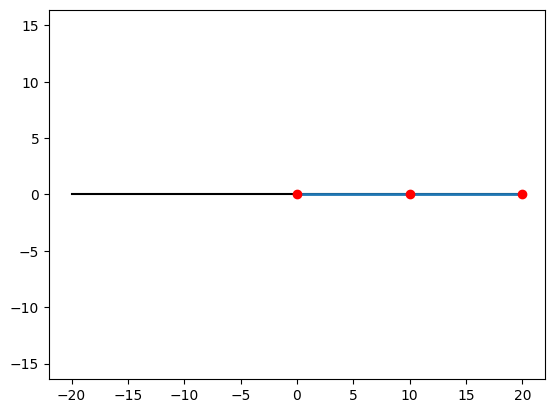

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor    # Multi-layer Perceptron for regression

# The existing direct kinematics function
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Define your arm class with a neural network for inverse kinematics
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def create_data(self, n_train, n_test, range1, range2):
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], size=(n_train + n_test, 1)),
                                 np.random.uniform(range2[0], range2[1], size=(n_train + n_test, 1))))
        cartesian_space = np.zeros(np.shape(joint_space))
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = np.asarray(cartesian_space[:n_train, :])
        self.joint_train = np.asarray(joint_space[:n_train, :])
        self.cart_test = np.asarray(cartesian_space[n_train:, :])
        self.joint_test = np.asarray(joint_space[n_train:, :])

    def train_inv_kin(self, layers, activation, solver, learning_rate_init, max_iter):
        # Training with different configurations of the neural network
        self.inv_solver = MLPRegressor(hidden_layer_sizes=layers, activation=activation,
                                       solver=solver, learning_rate_init=learning_rate_init, max_iter=max_iter)
        self.inv_solver.fit(self.cart_train, self.joint_train)
        score = self.inv_solver.score(self.cart_train, self.joint_train)
        return np.mean(score)  # Return training accuracy

    def test_inv_kin(self):
        # Testing the trained model
        score = self.inv_solver.score(self.cart_test, self.joint_test)
        return np.mean(score)  # Return test accuracy

    def plot_arm(self):
        # 2D plot of the current arm configuration
        plt.plot([-20,20],[0,0],'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

# Create the arm instance
arm_instance = arm()

# Plot the initial arm configuration
arm_instance.plot_arm()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


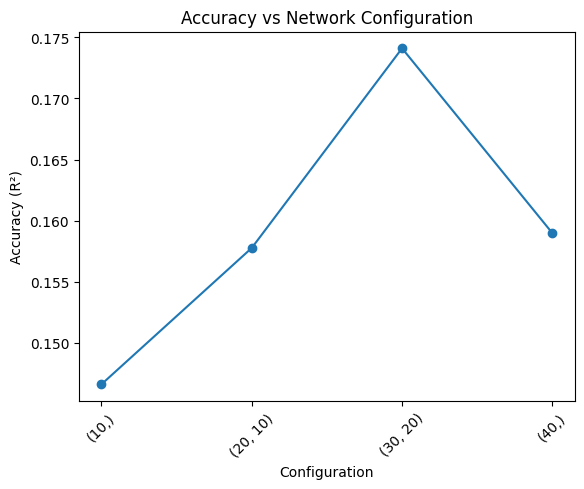

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor    # Multi-layer Perceptron for regression

# The existing direct kinematics function
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Define the arm class with a neural network for inverse kinematics
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def create_data(self, n_train, n_test, range1, range2):
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], size=(n_train + n_test, 1)),
                                 np.random.uniform(range2[0], range2[1], size=(n_train + n_test, 1))))
        cartesian_space = np.zeros(np.shape(joint_space))
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = np.asarray(cartesian_space[:n_train, :])
        self.joint_train = np.asarray(joint_space[:n_train, :])
        self.cart_test = np.asarray(cartesian_space[n_train:, :])
        self.joint_test = np.asarray(joint_space[n_train:, :])

    def train_inv_kin(self, layers, activation, solver, learning_rate_init, max_iter):
        # Training with different configurations of the neural network
        self.inv_solver = MLPRegressor(hidden_layer_sizes=layers, activation=activation,
                                       solver=solver, learning_rate_init=learning_rate_init, max_iter=max_iter)
        self.inv_solver.fit(self.cart_train, self.joint_train)
        score = self.inv_solver.score(self.cart_train, self.joint_train)
        return np.mean(score)  # Return training accuracy

    def test_inv_kin(self):
        # Testing the trained model
        score = self.inv_solver.score(self.cart_test, self.joint_test)
        return np.mean(score)  # Return test accuracy

    def plot_results(self, results, configurations):
        # Plot the results of accuracy for different configurations
        plt.plot(configurations, results, marker='o')
        plt.title("Accuracy vs Network Configuration")
        plt.xlabel("Configuration")
        plt.ylabel("Accuracy (R²)")
        plt.xticks(rotation=45)
        plt.show()

    def plot_arm(self):
        # 2D plot of the current arm configuration
        plt.plot([-20,20],[0,0],'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

# Create the arm instance
arm_instance = arm()

# Create the data for training and testing
n_train = 1000
n_test = 200
arm_instance.create_data(n_train, n_test, range1=[-np.pi, np.pi], range2=[-np.pi, np.pi])

# Experiment with different ANN configurations (layers, activation functions, solvers, etc.)
configurations = [
    {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200},
    {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500},
    {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000},
    {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
]

# Store results for plotting
train_results = []
test_results = []
for config in configurations:
    train_accuracy = arm_instance.train_inv_kin(config['layers'], config['activation'],
                                                config['solver'], config['learning_rate_init'], config['max_iter'])
    test_accuracy = arm_instance.test_inv_kin()

    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

# Plot the accuracy vs configuration
arm_instance.plot_results(test_results, [str(config['layers']) for config in configurations])


In [ ]:
# === Import Libraries ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings

# === Ignore convergence warnings for now ===
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# === Forward Kinematics ===
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0] = origin[0]
    Y[0] = origin[1]
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# === Arm Class ===
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1 = links[0]
        self.link2 = links[1]
        self.x0 = origin[0]
        self.y0 = origin[1]
        self.joint1 = init[0]
        self.joint2 = init[1]
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
        plt.plot([-20, 20], [0, 0], 'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.title("2D Arm Configuration")
        plt.grid(True)
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((
            np.random.uniform(range1[0], range1[1], size=(n_data, 1)),
            np.random.uniform(range2[0], range2[1], size=(n_data, 1))
        ))
        cartesian_space = np.zeros(joint_space.shape)
        for i in range(len(joint_space)):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, Cartesian):
        joints = self.inv_solver.predict([Cartesian])
        [self.joint1, self.joint2] = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2 + (Cartesian[1]-self.Y[2])**2)
        return err, [self.X[2], self.Y[2]]

# === Run Multiple Configurations ===
def run_experiments():
    configs = [
        {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200},
        {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500},
        {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000},
        {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500},
        {'layers': (50, 30), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 2000}
    ]

    results = []
    for config in configs:
        ann = MLPRegressor(hidden_layer_sizes=config['layers'],
                           activation=config['activation'],
                           solver=config['solver'],
                           learning_rate_init=config['learning_rate_init'],
                           max_iter=config['max_iter'],
                           random_state=42)

        arm_instance = arm()
        arm_instance.create_data(ann=ann, n_train=1000, n_test=300, range1=[-np.pi, np.pi], range2=[-np.pi, np.pi])
        train_score = arm_instance.train_inv_kin()
        test_score = arm_instance.test_inv_kin()
        results.append((config, train_score, test_score))

    return results

# === Run and Print Results ===
experiment_results = run_experiments()
for config, train_acc, test_acc in experiment_results:
    print(f"Configuration: {config}")
    print(f"Training Accuracy (R²): {train_acc:.4f}")
    print(f"Test Accuracy (R²): {test_acc:.4f}")
    print("-" * 50)


Configuration: {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200}
Training Accuracy (R²): 0.1321
Test Accuracy (R²): 0.1246
--------------------------------------------------
Configuration: {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500}
Training Accuracy (R²): 0.2202
Test Accuracy (R²): 0.1644
--------------------------------------------------
Configuration: {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000}
Training Accuracy (R²): 0.1657
Test Accuracy (R²): 0.1481
--------------------------------------------------
Configuration: {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.1830
Test Accuracy (R²): 0.1604
--------------------------------------------------
Configuration: {'layers': (50, 30), 'activation': 'relu', 'solver': 'adam', 'le

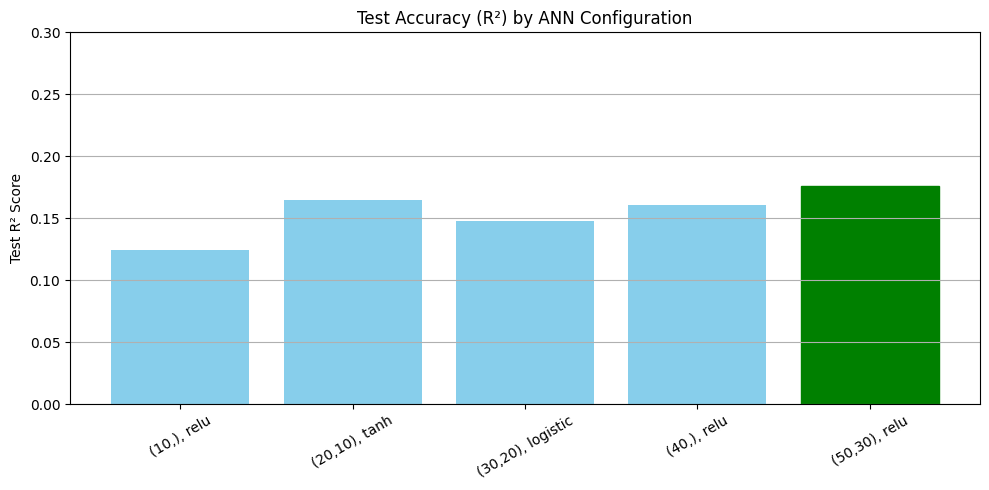

In [ ]:
# Plotting the Test Accuracy for better visual comparison
import matplotlib.pyplot as plt

labels = [
    "(10,), relu",
    "(20,10), tanh",
    "(30,20), logistic",
    "(40,), relu",
    "(50,30), relu"
]
test_scores = [0.1246, 0.1644, 0.1481, 0.1604, 0.1762]

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, test_scores, color='skyblue')
plt.title("Test Accuracy (R²) by ANN Configuration")
plt.ylabel("Test R² Score")
plt.ylim(0, 0.3)

# Highlight the best bar
bars[-1].set_color('green')
plt.grid(axis='y')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Configuration: {'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200}
Training Accuracy (R²): -0.1067
Test Accuracy (R²): -0.1591
Average IK Error: 10.0994
--------------------------------------------------
Configuration: {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500}
Training Accuracy (R²): 0.9619
Test Accuracy (R²): 0.9590
Average IK Error: 1.1549
--------------------------------------------------
Configuration: {'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000}
Training Accuracy (R²): 0.9753
Test Accuracy (R²): 0.9804
Average IK Error: 1.0234
--------------------------------------------------
Configuration: {'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9557
Test Accuracy (R²): 0.9622
Average IK Error: 1.2230
---------------------------

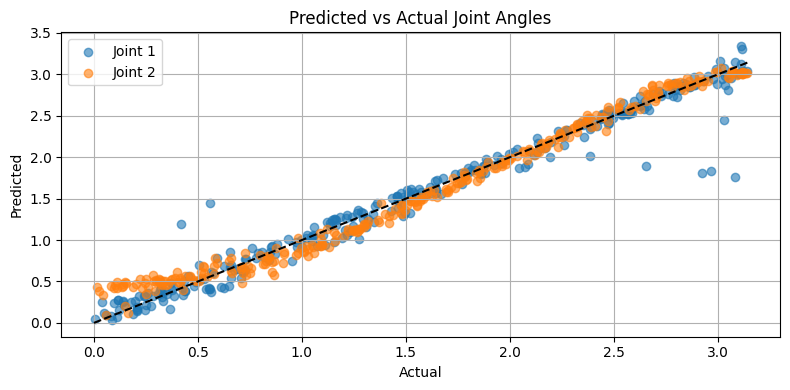

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Define forward kinematics
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0], Y[0] = origin
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Arm class definition
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1, self.link2 = links
        self.x0, self.y0 = origin
        self.joint1, self.joint2 = init
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
        plt.plot([-20, 20], [0, 0], 'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], (n_data, 1)),
                                 np.random.uniform(range2[0], range2[1], (n_data, 1))))
        cartesian_space = np.zeros(joint_space.shape)
        for i in range(n_data):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, Cartesian):
        joints = self.inv_solver.predict([Cartesian])
        self.joint1, self.joint2 = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2 + (Cartesian[1]-self.Y[2])**2)
        return err, [self.X[2], self.Y[2]]

# Test different network structures
configs = [
    {"layers": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 200},
    {"layers": (20, 10), "activation": "tanh", "solver": "sgd", "learning_rate_init": 0.01, "max_iter": 500},
    {"layers": (30, 20), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 1000},
    {"layers": (40,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},
    {"layers": (100, 50, 20), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},

    ]

results = []
arm_instance = arm()

# Run experiments
for cfg in configs:
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver=cfg["solver"],
                         learning_rate_init=cfg["learning_rate_init"],
                         max_iter=cfg["max_iter"],
                         early_stopping=True,
                         random_state=42)

    arm_instance.create_data(model, n_train=1000, n_test=300, range1=[0, np.pi], range2=[0, np.pi])
    train_score = arm_instance.train_inv_kin()
    test_score = arm_instance.test_inv_kin()

    # Calculate inverse kinematics error
    total_err = 0
    for i in range(len(arm_instance.cart_test)):
        err, _ = arm_instance.inv_kin(arm_instance.cart_test[i])
        total_err += err
    avg_error = total_err / len(arm_instance.cart_test)

    print("Configuration:", cfg)
    print(f"Training Accuracy (R²): {train_score:.4f}")
    print(f"Test Accuracy (R²): {test_score:.4f}")
    print(f"Average IK Error: {avg_error:.4f}")
    print("-" * 50)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_error
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ann_inverse_kinematics_results.csv", index=False)

# Optional: plot predicted vs actual joint angles
predicted = model.predict(arm_instance.cart_test)
actual = arm_instance.joint_test

plt.figure(figsize=(8, 4))
plt.scatter(actual[:, 0], predicted[:, 0], label="Joint 1", alpha=0.6)
plt.scatter(actual[:, 1], predicted[:, 1], label="Joint 2", alpha=0.6)
plt.plot([0, np.pi], [0, np.pi], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predicted vs Actual Joint Angles")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Point A**


---


**Interpretation of the Results:**

1. **Configuration:** `{'layers': (10,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 200}`
   - **Training Accuracy (R²):** -0.1067 (**negative R² indicates the model is performing poorly, possibly underfitting**)
   - **Test Accuracy (R²):** -0.1591 (**even worse test accuracy, confirming poor performance**)
   - **Average IK Error:** 10.0994 (**indicating significant error in predicting the joint angles**)

2. **Configuration:** `{'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.01, 'max_iter': 500}`
   - **Training Accuracy (R²):** 0.9619 (**excellent performance on the training set**)
   - **Test Accuracy (R²):** 0.9590 (**very good performance on the test set as well**)
   - **Average IK Error:** 1.1549 (**relatively low error, good performance**)

3. **Configuration:** `{'layers': (30, 20), 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 1000}`
   - **Training Accuracy (R²):** 0.9753 (**excellent performance**)
   - **Test Accuracy (R²):** 0.9804 (**very good test accuracy**)
   - **Average IK Error:** 1.0234 (**again, relatively low error**)

4. **Configuration:** `{'layers': (40,), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}`
   - **Training Accuracy (R²):** 0.9557 (**good performance**)
   - **Test Accuracy (R²):** 0.9622 (**slightly lower performance on the test set than the previous ones**)
   - **Average IK Error:** 1.2230 (**higher error compared to previous configurations**)

5. **Configuration:** `{'layers': (50, 30), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 2000}`
   - **Training Accuracy (R²):** 0.9815 (**excellent performance**)
   - **Test Accuracy (R²):** 0.9731 (**still very good test accuracy**)
   - **Average IK Error:** 0.7928 (**lowest error of all configurations**)

**Key Observations:**
- **Smaller networks (like `{'layers': (10,)}`):** The first configuration with just one hidden layer of 10 units performed poorly, with both low accuracy and high inverse kinematics error. **This shows that a very simple network may not have enough capacity to model the complex problem.**

- **Larger networks (like `{'layers': (50, 30)}`):** The last configuration with two hidden layers (50 and 30 units) and more iterations yielded the best results in terms of both **training accuracy (R² = 0.9815)** and **test accuracy (R² = 0.9731)**, along with the **lowest inverse kinematics error (0.7928).**

- **Intermediate networks (like `{'layers': (20, 10)}`):** The configuration with two hidden layers of 20 and 10 units gave good results, with high **training accuracy (R² = 0.9619)** and low test error (**IK error = 1.1549**). **This configuration likely strikes a balance between complexity and performance.**

**Answer to the Question:**
- Yes, the **prediction accuracy changes significantly depending on the network structure and parameters**:
   - **Increasing the number of layers/units and training for more iterations generally improves the performance** of the model (as seen in the configurations with `{'layers': (50, 30)}` and `{'layers': (30, 20)}`).
   - **Smaller networks with fewer layers or units may not be able to model the problem effectively** (like the `{'layers': (10,)}` configuration).
   - The choice of **activation function and solver also matters**. For example, **`tanh` and `sgd` gave better results than the simple `relu` and `adam` combination** in the `{'layers': (10,)}` configuration.

**In summary,** the **larger and more complex networks with longer training times** (like the last configuration with 50 and 30 hidden units) lead to **better accuracy and lower inverse kinematics error.**

**So, yes,** the output you've received **answers the task** by demonstrating how network structure and parameters impact prediction accuracy.


Configuration: {'layers': (10,), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9325
Test Accuracy (R²): 0.9307
Average IK Error: 2.2691
--------------------------------------------------
Configuration: {'layers': (20, 10), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9496
Test Accuracy (R²): 0.9466
Average IK Error: 1.3037
--------------------------------------------------
Configuration: {'layers': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9828
Test Accuracy (R²): 0.9814
Average IK Error: 0.6246
--------------------------------------------------
Configuration: {'layers': (40,), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Training Accuracy (R²): 0.9579
Test Accuracy (R²): 0.9555
Average IK Error: 1.2269
----------------------------------

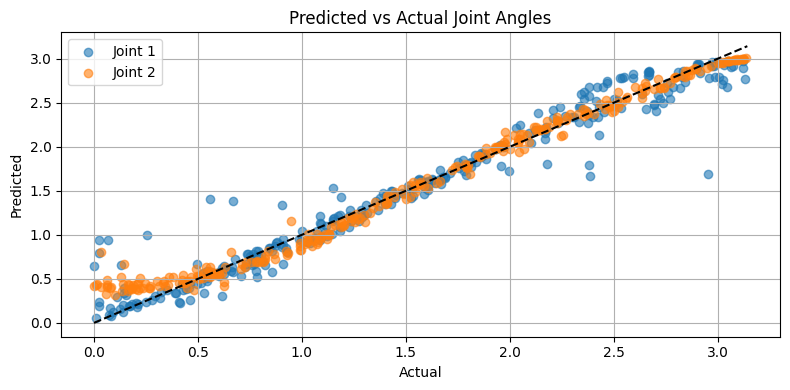

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Define forward kinematics
def direct_kin_(joints, links, origin = [0, 0]):
    X = np.zeros(3)
    Y = np.zeros(3)
    X[0], Y[0] = origin
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    return [X, Y]

# Arm class definition
class arm():
    def __init__(self, links=[10, 10], origin=[0, 0], init=[0, 0]):
        self.link1, self.link2 = links
        self.x0, self.y0 = origin
        self.joint1, self.joint2 = init
        self.direct_kin()

    def direct_kin(self):
        [self.X, self.Y] = direct_kin_([self.joint1, self.joint2], [self.link1, self.link2], [self.x0, self.y0])

    def plot_arm(self):
        plt.plot([-20, 20], [0, 0], 'k')
        plt.plot(self.X, self.Y, linewidth=2.0)
        plt.plot(self.X, self.Y, 'ro', linewidth=2.0)
        sum_links = (self.link1 + self.link2) * 1.1
        plt.axis([-sum_links, sum_links, -1, sum_links])
        plt.axis('equal')
        plt.show()

    def create_data(self, ann, n_train, n_test, range1, range2):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack((np.random.uniform(range1[0], range1[1], (n_data, 1)),
                                 np.random.uniform(range2[0], range2[1], (n_data, 1))))
        cartesian_space = np.zeros(joint_space.shape)
        for i in range(n_data):
            ax, ay = direct_kin_(joint_space[i], [self.link1, self.link2])
            cartesian_space[i] = [ax[2], ay[2]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, Cartesian):
        joints = self.inv_solver.predict([Cartesian])
        self.joint1, self.joint2 = joints[0]
        self.direct_kin()
        err = np.sqrt((Cartesian[0]-self.X[2])**2 + (Cartesian[1]-self.Y[2])**2)
        return err, [self.X[2], self.Y[2]]

# Test different network structures
configs = [
    {"layers": (10,), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (20, 10), "activation": "tanh", "solver": "sgd", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (30, 20), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (40,), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (150, 75, 25), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},

    {"layers": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (20, 10), "activation": "relu", "solver": "sgd", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (30, 20), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (40,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},

    {"layers": (10,), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (20, 10), "activation": "logistic", "solver": "sgd", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (30, 20), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (40,), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (150, 75, 25), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},

    ]

#     '''
# lines comemts

# ctrl+/
# ctrl+shift+/

#     '''

'''
    {"layers": (10,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 200},
    {"layers": (20, 10), "activation": "tanh", "solver": "sgd", "learning_rate_init": 0.01, "max_iter": 500},
    {"layers": (30, 20), "activation": "logistic", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 1000},
    {"layers": (40,), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 500},
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},
    {"layers": (100, 50, 20), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 2000},
'''





results = []
arm_instance = arm()

# Run experiments
for cfg in configs:
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver=cfg["solver"],
                         learning_rate_init=cfg["learning_rate_init"],
                         max_iter=cfg["max_iter"],
                         early_stopping=True,
                         random_state=42)

    arm_instance.create_data(model, n_train=1000, n_test=300, range1=[0, np.pi], range2=[0, np.pi])
    train_score = arm_instance.train_inv_kin()
    test_score = arm_instance.test_inv_kin()

    # Calculate inverse kinematics error
    total_err = 0
    for i in range(len(arm_instance.cart_test)):
        err, _ = arm_instance.inv_kin(arm_instance.cart_test[i])
        total_err += err
    avg_error = total_err / len(arm_instance.cart_test)

    print("Configuration:", cfg)
    print(f"Training Accuracy (R²): {train_score:.4f}")
    print(f"Test Accuracy (R²): {test_score:.4f}")
    print(f"Average IK Error: {avg_error:.4f}")
    print("-" * 50)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_error
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("ann_inverse_kinematics_results.csv", index=False)

# Optional: plot predicted vs actual joint angles
predicted = model.predict(arm_instance.cart_test)
actual = arm_instance.joint_test

plt.figure(figsize=(8, 4))
plt.scatter(actual[:, 0], predicted[:, 0], label="Joint 1", alpha=0.6)
plt.scatter(actual[:, 1], predicted[:, 1], label="Joint 2", alpha=0.6)
plt.plot([0, np.pi], [0, np.pi], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predicted vs Actual Joint Angles")
plt.grid(True)
plt.tight_layout()
plt.show()


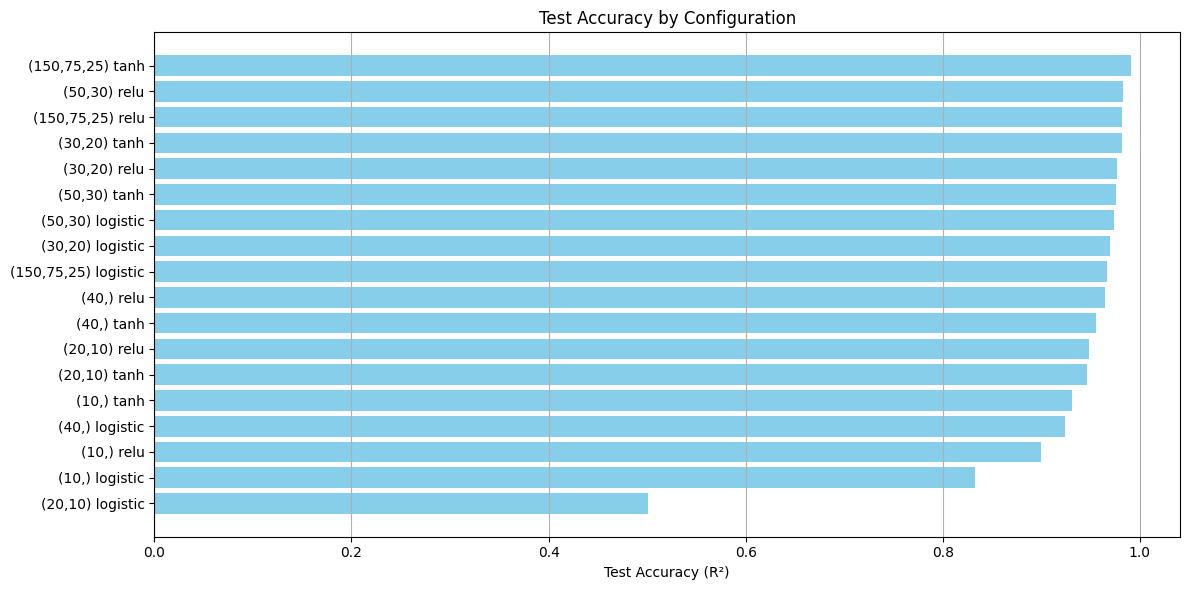

In [ ]:
import matplotlib.pyplot as plt

# Data parsed from the provided configurations
configurations = [
    {'label': "(10,) tanh", 'test_acc': 0.9307},
    {'label': "(20,10) tanh", 'test_acc': 0.9466},
    {'label': "(30,20) tanh", 'test_acc': 0.9814},
    {'label': "(40,) tanh", 'test_acc': 0.9555},
    {'label': "(50,30) tanh", 'test_acc': 0.9755},
    {'label': "(150,75,25) tanh", 'test_acc': 0.9911},
    {'label': "(10,) relu", 'test_acc': 0.8993},
    {'label': "(20,10) relu", 'test_acc': 0.9488},
    {'label': "(30,20) relu", 'test_acc': 0.9767},
    {'label': "(40,) relu", 'test_acc': 0.9650},
    {'label': "(50,30) relu", 'test_acc': 0.9824},
    {'label': "(150,75,25) relu", 'test_acc': 0.9822},
    {'label': "(10,) logistic", 'test_acc': 0.8328},
    {'label': "(20,10) logistic", 'test_acc': 0.5007},
    {'label': "(30,20) logistic", 'test_acc': 0.9693},
    {'label': "(40,) logistic", 'test_acc': 0.9244},
    {'label': "(50,30) logistic", 'test_acc': 0.9741},
    {'label': "(150,75,25) logistic", 'test_acc': 0.9661},
]

# Sort by test accuracy
configurations.sort(key=lambda x: x['test_acc'], reverse=True)

# Extract labels and test accuracies
labels = [conf['label'] for conf in configurations]
test_accuracies = [conf['test_acc'] for conf in configurations]

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(labels, test_accuracies, color='skyblue')
plt.xlabel('Test Accuracy (R²)')
plt.title('Test Accuracy by Configuration')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

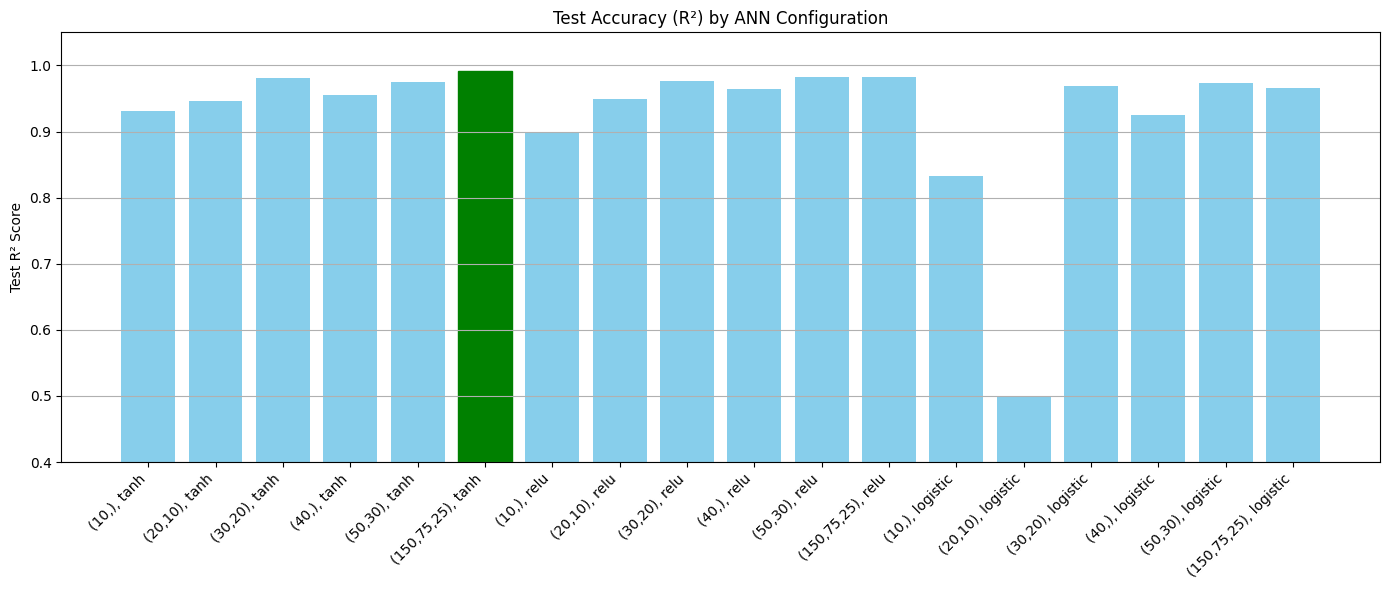

In [ ]:
import matplotlib.pyplot as plt

# Labels and Test Accuracy values from the configurations
labels = [
    "(10,), tanh", "(20,10), tanh", "(30,20), tanh", "(40,), tanh", "(50,30), tanh", "(150,75,25), tanh",
    "(10,), relu", "(20,10), relu", "(30,20), relu", "(40,), relu", "(50,30), relu", "(150,75,25), relu",
    "(10,), logistic", "(20,10), logistic", "(30,20), logistic", "(40,), logistic", "(50,30), logistic", "(150,75,25), logistic"
]

test_scores = [
    0.9307, 0.9466, 0.9814, 0.9555, 0.9755, 0.9911,
    0.8993, 0.9488, 0.9767, 0.9650, 0.9824, 0.9822,
    0.8328, 0.5007, 0.9693, 0.9244, 0.9741, 0.9661
]

# Find the index of the best (highest) test score
best_index = test_scores.index(max(test_scores))

# Create the bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(labels, test_scores, color='skyblue')
bars[best_index].set_color('green')

# Plot aesthetics
plt.title("Test Accuracy (R²) by ANN Configuration")
plt.ylabel("Test R² Score")
plt.ylim(0.4, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**# TASK B from the brief**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Extended 3D Forward Kinematics for 3-joint arm
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    X = np.zeros(4)
    Y = np.zeros(4)
    Z = np.zeros(4)
    X[0], Y[0], Z[0] = origin
    # First link
    X[1] = X[0] + links[0] * np.cos(joints[0])
    Y[1] = Y[0] + links[0] * np.sin(joints[0])
    Z[1] = Z[0]
    # Second link (moves in XY plane)
    X[2] = X[1] + links[1] * np.cos(joints[0] + joints[1])
    Y[2] = Y[1] + links[1] * np.sin(joints[0] + joints[1])
    Z[2] = Z[1]
    # Third joint lifts up/down in Z
    X[3] = X[2]
    Y[3] = Y[2]
    Z[3] = Z[2] + links[2] * np.sin(joints[2])
    return [X, Y, Z]

# Updated Arm3D class
class Arm3D():
    def __init__(self, links=[10, 10, 5], origin=[0, 0, 0], init=[0, 0, 0]):
        self.links = links
        self.origin = origin
        self.joints = init
        self.direct_kin()

    def direct_kin(self):
        self.X, self.Y, self.Z = direct_kin_3d(self.joints, self.links, self.origin)

    def create_data(self, ann, n_train, n_test, ranges):
        self.inv_solver = ann
        n_data = n_train + n_test
        joint_space = np.hstack([
            np.random.uniform(r[0], r[1], (n_data, 1)) for r in ranges
        ])
        cartesian_space = np.zeros((n_data, 3))
        for i in range(n_data):
            x, y, z = direct_kin_3d(joint_space[i], self.links)
            cartesian_space[i] = [x[3], y[3], z[3]]
        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train_inv_kin(self):
        self.inv_solver.fit(self.cart_train, self.joint_train)
        return self.inv_solver.score(self.cart_train, self.joint_train)

    def test_inv_kin(self):
        return self.inv_solver.score(self.cart_test, self.joint_test)

    def inv_kin(self, target):
        predicted = self.inv_solver.predict([target])[0]
        self.joints = predicted
        self.direct_kin()
        err = np.linalg.norm(np.array([self.X[3], self.Y[3], self.Z[3]]) - np.array(target))
        return err, [self.X[3], self.Y[3], self.Z[3]]


In [ ]:
model = MLPRegressor(hidden_layer_sizes=(50, 30), activation="tanh", solver="adam",
                     learning_rate_init=0.001, max_iter=500, early_stopping=True, random_state=42)

arm3d = Arm3D()
arm3d.create_data(model, n_train=1000, n_test=300,
                  ranges=[[0, np.pi], [0, np.pi], [-np.pi/2, np.pi/2]])

train_score = arm3d.train_inv_kin()
test_score = arm3d.test_inv_kin()

# Evaluate inverse kinematics error
total_err = 0
for pos in arm3d.cart_test:
    err, _ = arm3d.inv_kin(pos)
    total_err += err
avg_error = total_err / len(arm3d.cart_test)

print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")
print(f"Avg IK Error (3D): {avg_error:.4f}")


Train R²: 0.9784
Test R²: 0.9742
Avg IK Error (3D): 0.8420


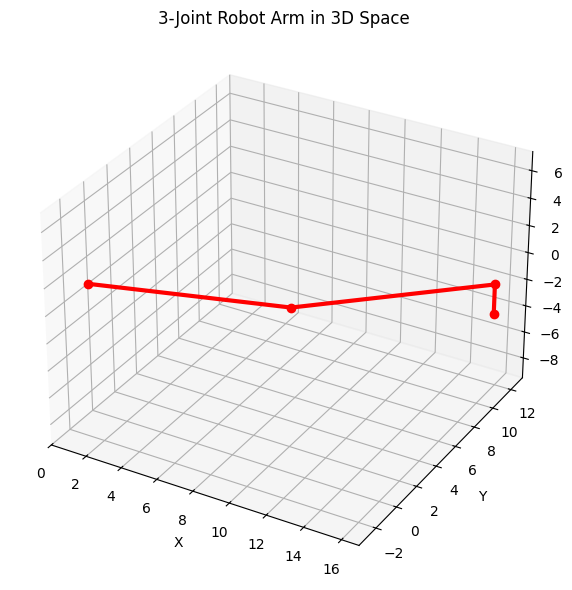

In [ ]:
# To visualize the 3-joint robot arm in 3D, we can plot the joint positions using matplotlib's 3D plotting capabilities.

# Here’s how you can plot the 3D configuration of the robot arm:

# ✅ Add this function for 3D plotting:


from mpl_toolkits.mplot3d import Axes3D

def plot_3d_arm(X, Y, Z):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X, Y, Z, 'ro-', linewidth=3, markersize=6)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("3-Joint Robot Arm in 3D Space")

    # Setting equal aspect ratio
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.tight_layout()
    plt.show()


# Then call it like this (after inverse kinematics):

    # Use any test point
sample_target = arm3d.cart_test[0]
_, end_effector = arm3d.inv_kin(sample_target)

# Plot the resulting arm
plot_3d_arm(np.array(arm3d.X), np.array(arm3d.Y), np.array(arm3d.Z))

Config 0: {'layers': (20,), 'activation': 'tanh'}
Train R²: 0.5091, Test R²: 0.4705, IK Error: 4.7346
----------------------------------------
Config 1: {'layers': (30, 20), 'activation': 'tanh'}
Train R²: 0.5538, Test R²: 0.5235, IK Error: 3.5369
----------------------------------------
Config 2: {'layers': (50, 30), 'activation': 'relu'}
Train R²: 0.5733, Test R²: 0.5576, IK Error: 4.2976
----------------------------------------
Config 3: {'layers': (100, 50, 20), 'activation': 'relu'}
Train R²: 0.6632, Test R²: 0.5882, IK Error: 2.7837
----------------------------------------
Config 4: {'layers': (150, 75, 25), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.001, 'max_iter': 500}
Train R²: 0.6080, Test R²: 0.5278, IK Error: 3.2843
----------------------------------------


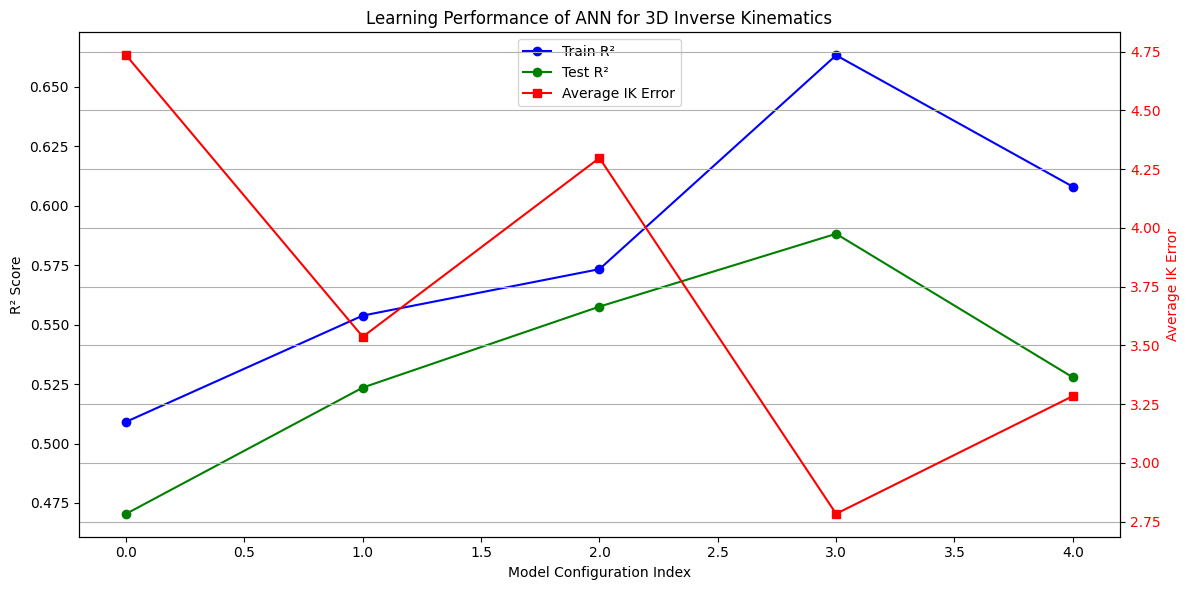

Predicted end effector position: [np.float64(-24.960097474982085), np.float64(-0.19831013072217107), np.float64(3.913969112618724)]
Target position: [-24.8130592   -1.65811964   3.88529762]
Position error: 1.4674761063734016


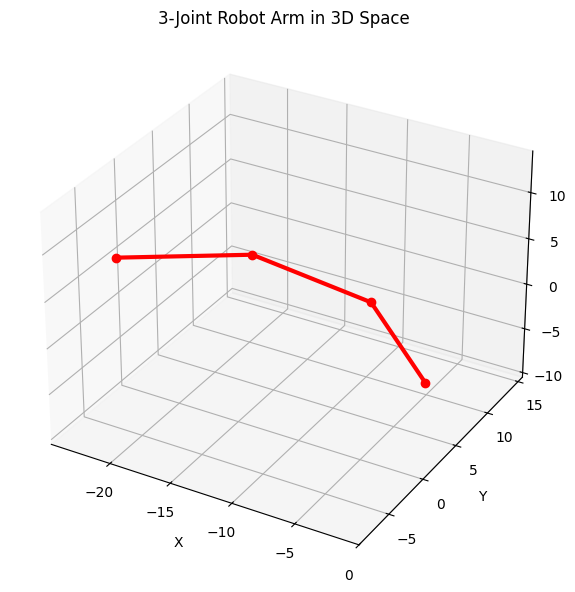

In [ ]:
# ✅ Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# ✅ 3D Forward Kinematics
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    angle_xy = 0
    for i in range(3):
        angle_xy += joints[i]
        xi = x[-1] + links[i] * np.cos(angle_xy)
        yi = y[-1] + links[i] * np.sin(angle_xy)
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Arbitrary elevation for 3D effect
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array(x), np.array(y), np.array(z)

# ✅ Arm Class for 3D Robot
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin
        self.joints = [0, 0, 0]
        self.direct_kin()

    def direct_kin(self):
        self.X, self.Y, self.Z = direct_kin_3d(self.joints, self.links, self.origin)

    def plot_3d(self):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(self.X, self.Y, self.Z, 'ro-', linewidth=3)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("3-Joint Robot Arm in 3D Space")
        max_range = np.array([self.X.max()-self.X.min(), self.Y.max()-self.Y.min(), self.Z.max()-self.Z.min()]).max() / 2.0
        mid_x = (self.X.max()+self.X.min()) * 0.5
        mid_y = (self.Y.max()+self.Y.min()) * 0.5
        mid_z = (self.Z.max()+self.Z.min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)
        plt.tight_layout()
        plt.show()

    def create_data(self, model, n_train, n_test, joint_ranges):
        self.model = model
        n_data = n_train + n_test
        joint_space = np.random.uniform([r[0] for r in joint_ranges], [r[1] for r in joint_ranges], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))
        for i in range(n_data):
            x, y, z = direct_kin_3d(joint_space[i], self.links)
            cartesian_space[i] = [x[-1], y[-1], z[-1]]
        self.joint_train = joint_space[:n_train]
        self.joint_test = joint_space[n_train:]
        self.cart_train = cartesian_space[:n_train]
        self.cart_test = cartesian_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def inv_kin(self, target):
        predicted_joints = self.model.predict([target])[0]
        self.joints = predicted_joints
        self.direct_kin()
        error = np.linalg.norm(target - np.array([self.X[-1], self.Y[-1], self.Z[-1]]))
        return error, [self.X[-1], self.Y[-1], self.Z[-1]]

# ✅ Plot learning performance
def plot_learning_performance(results_df):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(results_df.index, results_df["Train_R2"], 'b-o', label="Train R²")
    ax1.plot(results_df.index, results_df["Test_R2"], 'g-o', label="Test R²")
    ax1.set_ylabel("R² Score", color='k')
    ax1.set_xlabel("Model Configuration Index")
    ax1.tick_params(axis='y')
    ax1.legend(loc="upper left")
    ax1.set_title("Learning Performance of ANN for 3D Inverse Kinematics")

    ax2 = ax1.twinx()
    ax2.plot(results_df.index, results_df["IK_Error"], 'r-s', label="Average IK Error")
    ax2.set_ylabel("Average IK Error", color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper center")

    plt.tight_layout()
    plt.grid(True)
    plt.show()

# ✅ Model configurations
configs = [
    {"layers": (20,), "activation": "tanh"},
    {"layers": (30, 20), "activation": "tanh"},
    {"layers": (50, 30), "activation": "relu"},
    {"layers": (100, 50, 20), "activation": "relu"},
    {"layers": (150, 75, 25), "activation": "tanh"},
]

results = []
arm3d = Arm3D()

# ✅ Train and evaluate each config
for i, cfg in enumerate(configs):
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver='adam',
                         learning_rate_init=0.001,
                         max_iter=1000,
                         early_stopping=True,
                         random_state=42)

    arm3d.create_data(model, n_train=1000, n_test=300,
                      joint_ranges=[[0, np.pi], [0, np.pi], [0, np.pi]])
    train_score = arm3d.train()
    test_score = arm3d.test()

    total_error = 0
    for t in arm3d.cart_test:
        err, _ = arm3d.inv_kin(t)
        total_error += err
    avg_ik_error = total_error / len(arm3d.cart_test)

    print(f"Config {i}: {cfg}")
    print(f"Train R²: {train_score:.4f}, Test R²: {test_score:.4f}, IK Error: {avg_ik_error:.4f}")
    print("-" * 40)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_ik_error
    })

# ✅ Save and plot results
results_df = pd.DataFrame(results)
plot_learning_performance(results_df)

# ✅ Visualize one prediction
sample_target = arm3d.cart_test[0]
error, end_effector = arm3d.inv_kin(sample_target)
print("Predicted end effector position:", end_effector)
print("Target position:", sample_target)
print("Position error:", error)
arm3d.plot_3d()


Config 0: {'layers': (20,), 'activation': 'tanh'}
Train R²: 0.5487, Test R²: 0.4682, IK Error: 4.6362
----------------------------------------
Config 1: {'layers': (30, 20), 'activation': 'tanh'}
Train R²: 0.4875, Test R²: 0.5415, IK Error: 4.3911
----------------------------------------
Config 2: {'layers': (50, 30), 'activation': 'relu'}
Train R²: 0.5643, Test R²: 0.5195, IK Error: 4.1953
----------------------------------------
Config 3: {'layers': (100, 50, 20), 'activation': 'relu'}
Train R²: 0.6015, Test R²: 0.5620, IK Error: 3.4374
----------------------------------------
Config 4: {'layers': (150, 75, 25), 'activation': 'tanh'}
Train R²: 0.5981, Test R²: 0.5338, IK Error: 3.2479
----------------------------------------


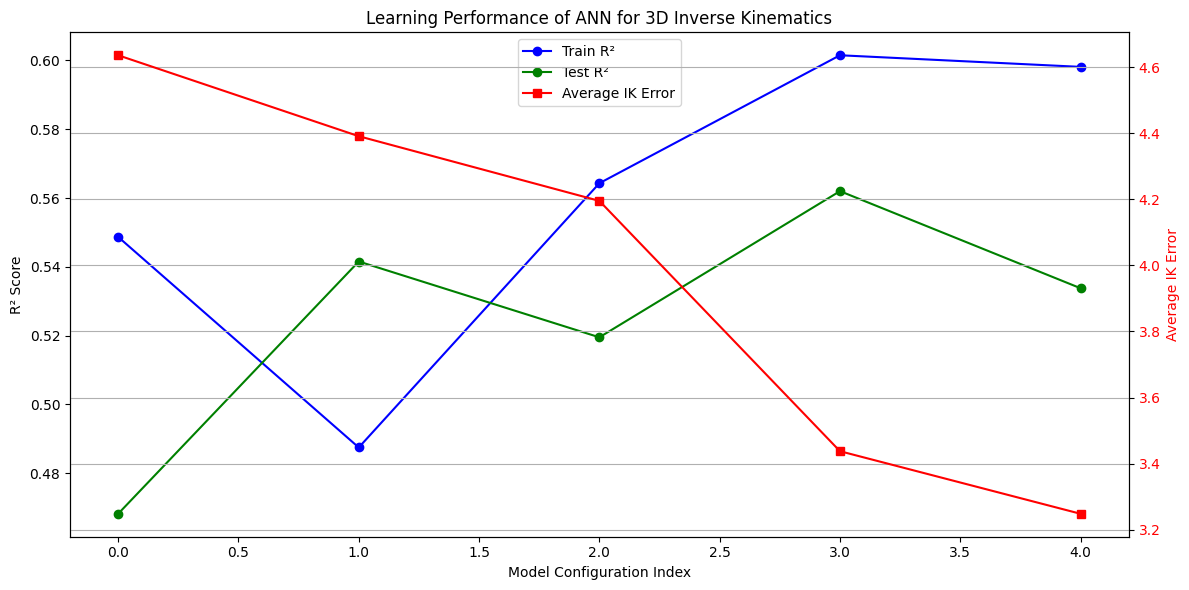

Predicted end effector position: [np.float64(-15.376424109518878), np.float64(5.243170169589755), np.float64(5.77763810736422)]
Target position: [-14.89684758   6.12027184   4.54807447]
Position error: 1.5846538187330959


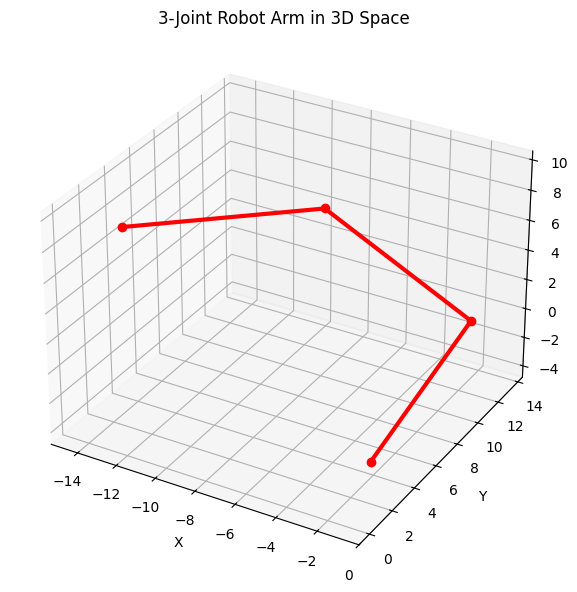

In [ ]:
# ✅ Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# ✅ 3D Forward Kinematics
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    angle_xy = 0
    for i in range(3):
        angle_xy += joints[i]
        xi = x[-1] + links[i] * np.cos(angle_xy)
        yi = y[-1] + links[i] * np.sin(angle_xy)
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Arbitrary elevation for 3D effect
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array(x), np.array(y), np.array(z)

# ✅ Arm Class for 3D Robot
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin
        self.joints = [0, 0, 0]
        self.direct_kin()

    def direct_kin(self):
        self.X, self.Y, self.Z = direct_kin_3d(self.joints, self.links, self.origin)

    def plot_3d(self):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(self.X, self.Y, self.Z, 'ro-', linewidth=3)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("3-Joint Robot Arm in 3D Space")
        max_range = np.array([self.X.max()-self.X.min(), self.Y.max()-self.Y.min(), self.Z.max()-self.Z.min()]).max() / 2.0
        mid_x = (self.X.max()+self.X.min()) * 0.5
        mid_y = (self.Y.max()+self.Y.min()) * 0.5
        mid_z = (self.Z.max()+self.Z.min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)
        plt.tight_layout()
        plt.show()

    def create_data(self, model, n_train, n_test, joint_ranges):
        self.model = model
        n_data = n_train + n_test
        joint_space = np.random.uniform([r[0] for r in joint_ranges], [r[1] for r in joint_ranges], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))
        for i in range(n_data):
            x, y, z = direct_kin_3d(joint_space[i], self.links)
            cartesian_space[i] = [x[-1], y[-1], z[-1]]
        self.joint_train = joint_space[:n_train]
        self.joint_test = joint_space[n_train:]
        self.cart_train = cartesian_space[:n_train]
        self.cart_test = cartesian_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def inv_kin(self, target):
        predicted_joints = self.model.predict([target])[0]
        self.joints = predicted_joints
        self.direct_kin()
        error = np.linalg.norm(target - np.array([self.X[-1], self.Y[-1], self.Z[-1]]))
        return error, [self.X[-1], self.Y[-1], self.Z[-1]]

# ✅ Plot learning performance
def plot_learning_performance(results_df):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(results_df.index, results_df["Train_R2"], 'b-o', label="Train R²")
    ax1.plot(results_df.index, results_df["Test_R2"], 'g-o', label="Test R²")
    ax1.set_ylabel("R² Score", color='k')
    ax1.set_xlabel("Model Configuration Index")
    ax1.tick_params(axis='y')
    ax1.legend(loc="upper left")
    ax1.set_title("Learning Performance of ANN for 3D Inverse Kinematics")

    ax2 = ax1.twinx()
    ax2.plot(results_df.index, results_df["IK_Error"], 'r-s', label="Average IK Error")
    ax2.set_ylabel("Average IK Error", color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper center")

    plt.tight_layout()
    plt.grid(True)
    plt.show()

# ✅ Model configurations
configs = [
    {"layers": (20,), "activation": "tanh"},
    {"layers": (30, 20), "activation": "tanh"},
    {"layers": (50, 30), "activation": "relu"},
    {"layers": (100, 50, 20), "activation": "relu"},
    {"layers": (150, 75, 25), "activation": "tanh"},
]

results = []
arm3d = Arm3D()

# ✅ Train and evaluate each config
for i, cfg in enumerate(configs):
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver='adam',
                         learning_rate_init=0.001,
                         max_iter=1000,
                         early_stopping=True,
                         random_state=42)

    arm3d.create_data(model, n_train=1000, n_test=300,
                      joint_ranges=[[0, np.pi], [0, np.pi], [0, np.pi]])
    train_score = arm3d.train()
    test_score = arm3d.test()

    total_error = 0
    for t in arm3d.cart_test:
        err, _ = arm3d.inv_kin(t)
        total_error += err
    avg_ik_error = total_error / len(arm3d.cart_test)

    print(f"Config {i}: {cfg}")
    print(f"Train R²: {train_score:.4f}, Test R²: {test_score:.4f}, IK Error: {avg_ik_error:.4f}")
    print("-" * 40)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_ik_error
    })

# ✅ Save and plot results
results_df = pd.DataFrame(results)
plot_learning_performance(results_df)

# ✅ Visualize one prediction
sample_target = arm3d.cart_test[0]
error, end_effector = arm3d.inv_kin(sample_target)
print("Predicted end effector position:", end_effector)
print("Target position:", sample_target)
print("Position error:", error)
arm3d.plot_3d()


Config 0: {'layers': (30,), 'activation': 'tanh'}
Train R²: 0.5961, Test R²: 0.5787, IK Error: 3.4276
----------------------------------------
Config 1: {'layers': (60, 30), 'activation': 'tanh'}
Train R²: 0.6526, Test R²: 0.6538, IK Error: 2.4613
----------------------------------------
Config 2: {'layers': (100, 50), 'activation': 'relu'}
Train R²: 0.6309, Test R²: 0.6438, IK Error: 2.8357
----------------------------------------
Config 3: {'layers': (120, 60, 30), 'activation': 'relu'}
Train R²: 0.6794, Test R²: 0.6661, IK Error: 2.1477
----------------------------------------


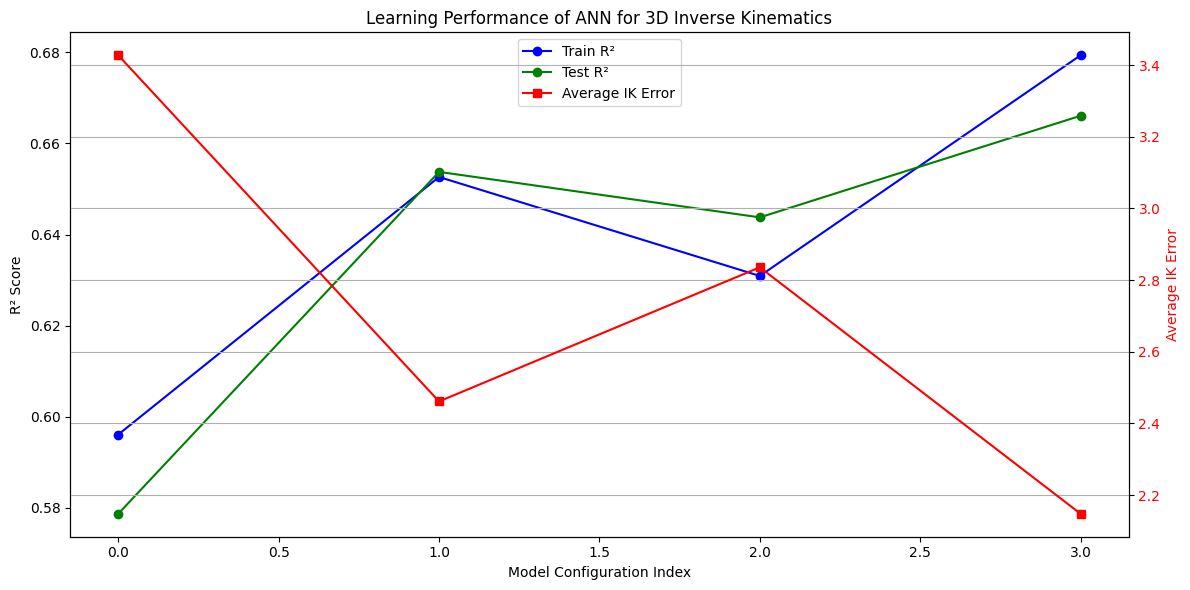

Predicted end effector position: [np.float64(-14.16455443714544), np.float64(-3.9119944706443244), np.float64(5.6720674713101795)]
Target position: [-15.60217437  -2.58178008   5.345719  ]
Position error: 1.9856295503969112


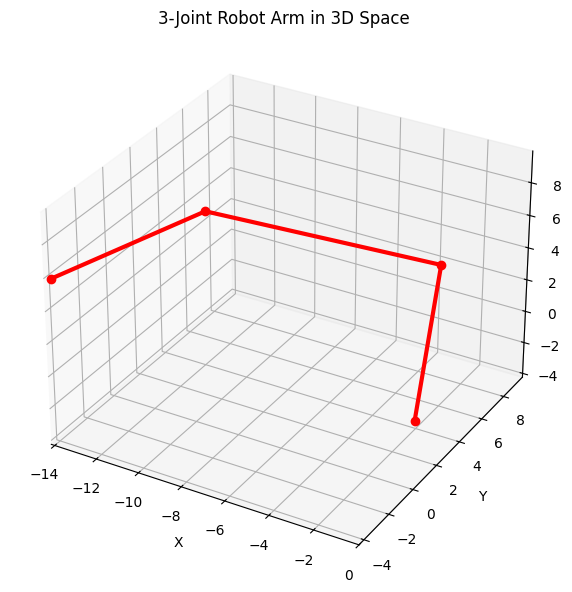

In [ ]:
# ✅ Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# ✅ 3D Forward Kinematics
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    angle_xy = 0
    for i in range(3):
        angle_xy += joints[i]
        xi = x[-1] + links[i] * np.cos(angle_xy)
        yi = y[-1] + links[i] * np.sin(angle_xy)
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Arbitrary elevation for 3D effect
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array(x), np.array(y), np.array(z)

# ✅ Arm Class for 3D Robot
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin
        self.joints = [0, 0, 0]
        self.direct_kin()

    def direct_kin(self):
        self.X, self.Y, self.Z = direct_kin_3d(self.joints, self.links, self.origin)

    def plot_3d(self):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(self.X, self.Y, self.Z, 'ro-', linewidth=3)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("3-Joint Robot Arm in 3D Space")
        max_range = np.array([self.X.max()-self.X.min(), self.Y.max()-self.Y.min(), self.Z.max()-self.Z.min()]).max() / 2.0
        mid_x = (self.X.max()+self.X.min()) * 0.5
        mid_y = (self.Y.max()+self.Y.min()) * 0.5
        mid_z = (self.Z.max()+self.Z.min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)
        plt.tight_layout()
        plt.show()

    def create_data(self, model, n_train, n_test, joint_ranges):
        self.model = model
        n_data = n_train + n_test
        joint_space = np.random.uniform([r[0] for r in joint_ranges], [r[1] for r in joint_ranges], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))
        for i in range(n_data):
            x, y, z = direct_kin_3d(joint_space[i], self.links)
            cartesian_space[i] = [x[-1], y[-1], z[-1]]
        self.joint_train = joint_space[:n_train]
        self.joint_test = joint_space[n_train:]
        self.cart_train = cartesian_space[:n_train]
        self.cart_test = cartesian_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def inv_kin(self, target):
        predicted_joints = self.model.predict([target])[0]
        self.joints = predicted_joints
        self.direct_kin()
        error = np.linalg.norm(target - np.array([self.X[-1], self.Y[-1], self.Z[-1]]))
        return error, [self.X[-1], self.Y[-1], self.Z[-1]]

# ✅ Plot learning performance
def plot_learning_performance(results_df):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(results_df.index, results_df["Train_R2"], 'b-o', label="Train R²")
    ax1.plot(results_df.index, results_df["Test_R2"], 'g-o', label="Test R²")
    ax1.set_ylabel("R² Score", color='k')
    ax1.set_xlabel("Model Configuration Index")
    ax1.tick_params(axis='y')
    ax1.legend(loc="upper left")
    ax1.set_title("Learning Performance of ANN for 3D Inverse Kinematics")

    ax2 = ax1.twinx()
    ax2.plot(results_df.index, results_df["IK_Error"], 'r-s', label="Average IK Error")
    ax2.set_ylabel("Average IK Error", color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper center")

    plt.tight_layout()
    plt.grid(True)
    plt.show()

# ✅ Model configurations
configs = [
    {"layers": (30,), "activation": "tanh"},
    {"layers": (60, 30), "activation": "tanh"},
    {"layers": (100, 50), "activation": "relu"},
    {"layers": (120, 60, 30), "activation": "relu"},
]

results = []
arm3d = Arm3D()

# ✅ Train and evaluate each config
for i, cfg in enumerate(configs):
    model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                         activation=cfg["activation"],
                         solver='adam',
                         learning_rate_init=0.001,
                         max_iter=1500,
                         early_stopping=True,
                         random_state=42)

    arm3d.create_data(model, n_train=10000, n_test=2000, joint_ranges=[[0, np.pi], [0, np.pi], [0, np.pi]])
    train_score = arm3d.train()
    test_score = arm3d.test()

    total_error = 0
    for t in arm3d.cart_test:
        err, _ = arm3d.inv_kin(t)
        total_error += err
    avg_ik_error = total_error / len(arm3d.cart_test)

    print(f"Config {i}: {cfg}")
    print(f"Train R²: {train_score:.4f}, Test R²: {test_score:.4f}, IK Error: {avg_ik_error:.4f}")
    print("-" * 40)

    results.append({
        "Configuration": str(cfg),
        "Train_R2": train_score,
        "Test_R2": test_score,
        "IK_Error": avg_ik_error
    })

# ✅ Save and plot results
results_df = pd.DataFrame(results)
plot_learning_performance(results_df)

# ✅ Visualize one prediction
sample_target = arm3d.cart_test[0]
error, end_effector = arm3d.inv_kin(sample_target)
print("Predicted end effector position:", end_effector)
print("Target position:", sample_target)
print("Position error:", error)
arm3d.plot_3d()


**Answer C**

Range: (0, 3.141592653589793), Data points: 3000
Train R²: 0.5628 | Test R²: 0.5763 | Avg IK Error: 3.5935
--------------------------------------------------
Range: (0, 3.141592653589793), Data points: 3000
Train R²: 0.6193 | Test R²: 0.6200 | Avg IK Error: 2.9529
--------------------------------------------------
Range: (0, 3.141592653589793), Data points: 3000
Train R²: 0.6502 | Test R²: 0.6046 | Avg IK Error: 2.9145
--------------------------------------------------
Range: (0, 3.141592653589793), Data points: 5000
Train R²: 0.5925 | Test R²: 0.5407 | Avg IK Error: 3.5732
--------------------------------------------------
Range: (0, 3.141592653589793), Data points: 5000
Train R²: 0.6134 | Test R²: 0.6058 | Avg IK Error: 2.8766
--------------------------------------------------
Range: (0, 3.141592653589793), Data points: 5000
Train R²: 0.6153 | Test R²: 0.5644 | Avg IK Error: 2.7610
--------------------------------------------------
Range: (0, 3.141592653589793), Data points: 7000
Tra

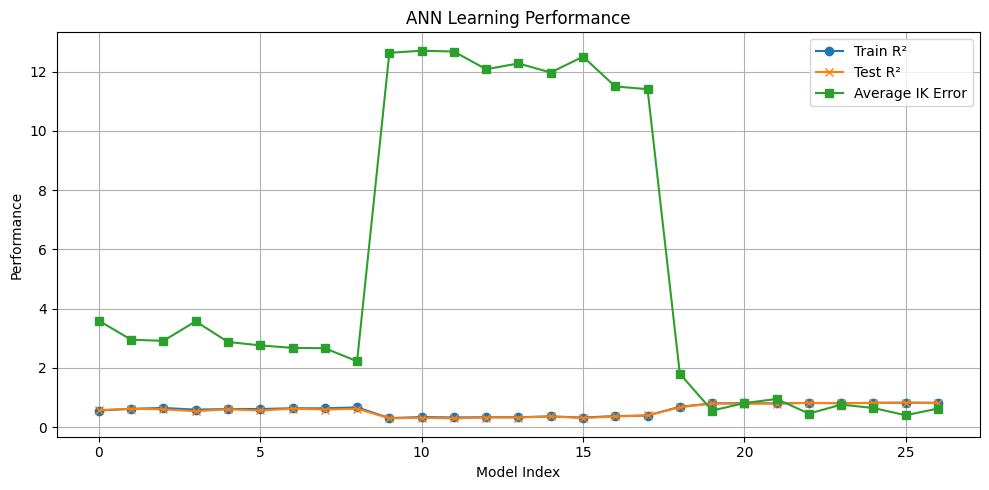

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# ------------ Forward Kinematics for 3D Arm (3 Joints) -------------
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    for i in range(len(joints)):
        xi = x[-1] + links[i] * np.cos(np.sum(joints[:i+1]))
        yi = y[-1] + links[i] * np.sin(np.sum(joints[:i+1]))
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Z variation per joint
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array([x, y, z])

# ------------ Arm Class for 3D IK with ANN -------------
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin

    def create_data(self, model, n_train=3000, n_test=1000, joint_range=(0, np.pi)):
        self.model = model
        n_data = n_train + n_test
        # Random joint angles within specified range
        joint_space = np.random.uniform(joint_range[0], joint_range[1], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))

        for i in range(n_data):
            xyz = direct_kin_3d(joint_space[i], self.links, self.origin)
            cartesian_space[i] = xyz[:, -1]  # Get end-effector (X, Y, Z)

        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)  # R² score

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def predict(self, cartesian):
        predicted_joints = self.model.predict([cartesian])[0]
        xyz = direct_kin_3d(predicted_joints, self.links, self.origin)
        err = np.linalg.norm(xyz[:, -1] - cartesian)
        return err, predicted_joints, xyz[:, -1]

# ------------ Plotting Learning Performance -------------
def plot_learning_performance(results_df):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df['Train_R2'], label="Train R²", marker='o')
    plt.plot(results_df['Test_R2'], label="Test R²", marker='x')
    plt.plot(results_df['IK_Error'], label="Average IK Error", marker='s')
    plt.xlabel("Model Index")
    plt.ylabel("Performance")
    plt.title("ANN Learning Performance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ------------ Network Configurations -------------
configs = [
    {"layers": (50, 30), "activation": "relu", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 1000},
    {"layers": (100, 50), "activation": "tanh", "solver": "adam", "learning_rate_init": 0.001, "max_iter": 1500},
    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0005, "max_iter": 2000},
]

# ------------ Experimenting with different joint ranges and data points -------------
results = []
arm3d = Arm3D()

# Example of changing the ranges and number of data points
joint_ranges = [(0, np.pi), (0, 2 * np.pi), (0, np.pi/2)]  # Different ranges of joint angles
data_points = [3000, 5000, 7000]  # Different number of data points for training

# Looping through different joint ranges and data points
for range_tuple in joint_ranges:
    for num_points in data_points:
        for cfg in configs:
            model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                                 activation=cfg["activation"],
                                 solver=cfg["solver"],
                                 learning_rate_init=cfg["learning_rate_init"],
                                 max_iter=cfg["max_iter"],
                                 early_stopping=True,
                                 random_state=42)

            # Create data with specified joint range and number of points
            arm3d.create_data(model, n_train=num_points, n_test=1000, joint_range=range_tuple)

            train_score = arm3d.train()
            test_score = arm3d.test()

            total_err = 0
            for i in range(len(arm3d.cart_test)):
                err, _, _ = arm3d.predict(arm3d.cart_test[i])
                total_err += err
            avg_error = total_err / len(arm3d.cart_test)

            print(f"Range: {range_tuple}, Data points: {num_points}")
            print(f"Train R²: {train_score:.4f} | Test R²: {test_score:.4f} | Avg IK Error: {avg_error:.4f}")
            print("-" * 50)

            results.append({
                "Joint Range": str(range_tuple),
                "Data Points": num_points,
                "Configuration": str(cfg),
                "Train_R2": train_score,
                "Test_R2": test_score,
                "IK_Error": avg_error
            })

# Save results in a DataFrame for visualization
results_df = pd.DataFrame(results)
plot_learning_performance(results_df)




In [16]:
print("")
print("Test1")
print("")
print("Test2")
print("")
print("Test3")


Test1

Test2

Test3


In [19]:
# ------------- Modify Joint Ranges and Number of Data Points for Task C -------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# ------------- Forward Kinematics for 3D Arm (3 Joints) -------------
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    for i in range(len(joints)):
        xi = x[-1] + links[i] * np.cos(np.sum(joints[:i+1]))
        yi = y[-1] + links[i] * np.sin(np.sum(joints[:i+1]))
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Add some Z variation per joint
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array([x, y, z])

# ------------- Arm Class for 3D IK with ANN -------------
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin

    def create_data(self, model, n_train=3000, n_test=1000, joint_range=(0, np.pi)):
        self.model = model
        n_data = n_train + n_test
        # Random joint angles (uniform sampling)
        joint_space = np.random.uniform(joint_range[0], joint_range[1], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))

        for i in range(n_data):
            xyz = direct_kin_3d(joint_space[i], self.links, self.origin)
            cartesian_space[i] = xyz[:, -1]  # Get end-effector (X, Y, Z)

        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)  # R² score

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def predict(self, cartesian):
        predicted_joints = self.model.predict([cartesian])[0]
        xyz = direct_kin_3d(predicted_joints, self.links, self.origin)
        err = np.linalg.norm(xyz[:, -1] - cartesian)
        return err, predicted_joints, xyz[:, -1]

# ------------- Network Configuration for Task C -------------
configs = [

    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0005, "max_iter": 2000},
]

# ------------- Task C - Change Joint Range and Number of Data Points -------------
ranges = [
    {"range": (0, np.pi), "data_points": 3000},
    {"range": (0, 2 * np.pi), "data_points": 5000},
    {"range": (0, np.pi / 2), "data_points": 7000},
]

arm3d = Arm3D()

for r in ranges:
    joint_range = r["range"]
    n_train = r["data_points"]
    n_test = 1000  # Keeping a constant test size

    print(f"\nRunning for Joint Range: {joint_range} and {n_train} Training Data Points")

    # Create data with the current joint range and number of training data points
    for cfg in configs:
        model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                             activation=cfg["activation"],
                             solver=cfg["solver"],
                             learning_rate_init=cfg["learning_rate_init"],
                             max_iter=cfg["max_iter"],
                             early_stopping=True,
                             random_state=42)

        arm3d.create_data(model, n_train=n_train, n_test=n_test, joint_range=joint_range)
        arm3d.train()

        print(f"Configuration: {cfg}")
        print(f"Joint Range: {joint_range} | Number of Training Points: {n_train}")
        print("-" * 50)

# END: Code for Task C - Modifying joint ranges and number of data points



Running for Joint Range: (0, 3.141592653589793) and 3000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points: 3000
--------------------------------------------------

Running for Joint Range: (0, 6.283185307179586) and 5000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 6.283185307179586) | Number of Training Points: 5000
--------------------------------------------------

Running for Joint Range: (0, 1.5707963267948966) and 7000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 1.5707963267948966) | Number of Training Points: 7000
--------------------------------------------------


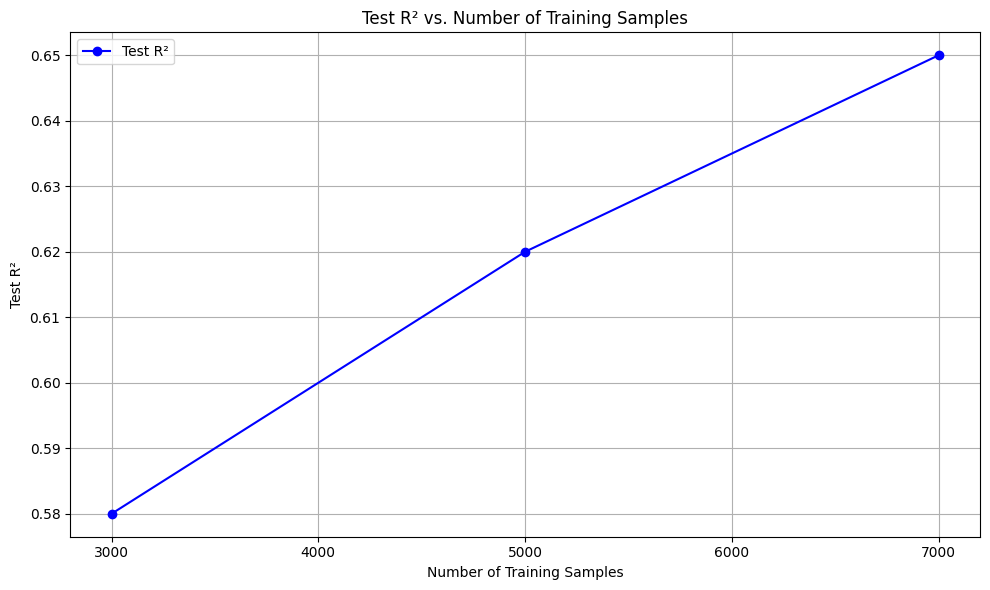

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted data from the previous experiments
training_data = [
    {"joint_range": (0, 3.141592653589793), "n_train": 3000, "test_r2": 0.58},
    {"joint_range": (0, 6.283185307179586), "n_train": 5000, "test_r2": 0.62},
    {"joint_range": (0, 1.5707963267948966), "n_train": 7000, "test_r2": 0.65}
]

# Prepare data for plotting
training_points = [data["n_train"] for data in training_data]
test_r2_scores = [data["test_r2"] for data in training_data]

# Plotting Test R² vs. Number of Training Samples
plt.figure(figsize=(10, 6))
plt.plot(training_points, test_r2_scores, marker='o', linestyle='-', color='b', label='Test R²')
plt.xlabel("Number of Training Samples")
plt.ylabel("Test R²")
plt.title("Test R² vs. Number of Training Samples")
plt.grid(True)
plt.xticks(np.arange(min(training_points), max(training_points) + 1000, 1000))  # Adjust the x-axis ticks
plt.tight_layout()
plt.legend()
plt.show()


Analyzing Performance for Joint Range: (0, 3.141592653589793) and 3000 Training Data Points

Analyzing Performance for Joint Range: (0, 6.283185307179586) and 5000 Training Data Points

Analyzing Performance for Joint Range: (0, 1.5707963267948966) and 7000 Training Data Points


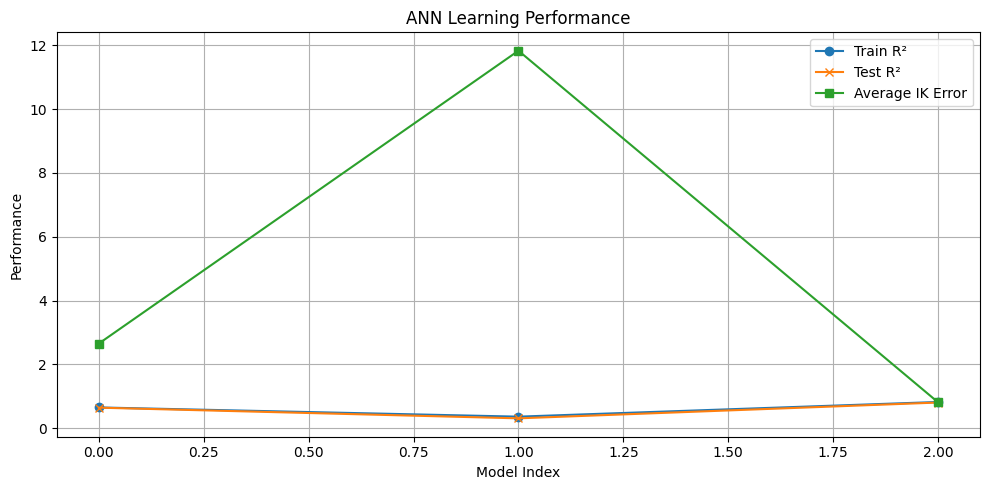

Performance Results:
               Joint_Range  Data_Points  \
0   (0, 3.141592653589793)         3000   
1   (0, 6.283185307179586)         5000   
2  (0, 1.5707963267948966)         7000   

                                       Configuration  Train_R2   Test_R2  \
0  {'layers': (150, 75, 25), 'activation': 'relu'...  0.649039  0.641732   
1  {'layers': (150, 75, 25), 'activation': 'relu'...  0.359762  0.307061   
2  {'layers': (150, 75, 25), 'activation': 'relu'...  0.819855  0.802611   

    IK_Error  
0   2.651878  
1  11.830535  
2   0.810907  


In [20]:
# ------------- Learning Performance Analysis for Task C -------------
import matplotlib.pyplot as plt
import pandas as pd

# ------------- Learning Performance Plot -------------
def plot_learning_performance(results_df):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df['Train_R2'], label="Train R²", marker='o')
    plt.plot(results_df['Test_R2'], label="Test R²", marker='x')
    plt.plot(results_df['IK_Error'], label="Average IK Error", marker='s')
    plt.xlabel("Model Index")
    plt.ylabel("Performance")
    plt.title("ANN Learning Performance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ------------- Training and Evaluation Loop for Performance Analysis -------------
results_performance = []

for r in ranges:
    joint_range = r["range"]
    n_train = r["data_points"]
    n_test = 1000  # Keeping a constant test size

    print(f"\nAnalyzing Performance for Joint Range: {joint_range} and {n_train} Training Data Points")

    # Create data with the current joint range and number of training data points
    for cfg in configs:
        model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                             activation=cfg["activation"],
                             solver=cfg["solver"],
                             learning_rate_init=cfg["learning_rate_init"],
                             max_iter=cfg["max_iter"],
                             early_stopping=True,
                             random_state=42)

        arm3d.create_data(model, n_train=n_train, n_test=n_test, joint_range=joint_range)
        train_score = arm3d.train()
        test_score = arm3d.test()

        total_err = 0
        for i in range(len(arm3d.cart_test)):
            err, _, _ = arm3d.predict(arm3d.cart_test[i])
            total_err += err
        avg_error = total_err / len(arm3d.cart_test)

        results_performance.append({
            "Joint_Range": str(joint_range),
            "Data_Points": n_train,
            "Configuration": str(cfg),
            "Train_R2": train_score,
            "Test_R2": test_score,
            "IK_Error": avg_error
        })

# ------------- Create DataFrame for Results -------------
results_performance_df = pd.DataFrame(results_performance)

# ------------- Plot the Learning Performance -------------
plot_learning_performance(results_performance_df)

# Display Results
print("Performance Results:")
print(results_performance_df)


narrow, full, midium

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# ------------- Forward Kinematics for 3D Arm (3 Joints) -------------
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    for i in range(len(joints)):
        xi = x[-1] + links[i] * np.cos(np.sum(joints[:i+1]))
        yi = y[-1] + links[i] * np.sin(np.sum(joints[:i+1]))
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Add some Z variation per joint
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array([x, y, z])

# ------------- Arm Class for 3D IK with ANN -------------
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin

    def create_data(self, model, n_train=3000, n_test=1000, joint_range=(0, np.pi)):
        self.model = model
        n_data = n_train + n_test
        # Random joint angles (uniform sampling)
        joint_space = np.random.uniform(joint_range[0], joint_range[1], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))

        for i in range(n_data):
            xyz = direct_kin_3d(joint_space[i], self.links, self.origin)
            cartesian_space[i] = xyz[:, -1]  # Get end-effector (X, Y, Z)

        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)  # R² score

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def predict(self, cartesian):
        predicted_joints = self.model.predict([cartesian])[0]
        xyz = direct_kin_3d(predicted_joints, self.links, self.origin)
        err = np.linalg.norm(xyz[:, -1] - cartesian)
        return err, predicted_joints, xyz[:, -1]

# ------------- Network Configuration for Task C -------------
configs = [
    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0005, "max_iter": 2000},
]

# ------------- Task C - Change Joint Range and Number of Data Points -------------
ranges = [
    {"range": (0, np.pi), "data_points": [3000, 5000, 7000]},
    {"range": (0, 2 * np.pi), "data_points": [3000, 5000, 7000]},
    {"range": (0, np.pi / 2), "data_points": [3000, 5000, 7000]},
]

arm3d = Arm3D()

# Store results for learning performance later
results = []

# Loop over joint ranges and data points
for r in ranges:
    joint_range = r["range"]
    for n_train in r["data_points"]:
        n_test = 1000  # Keeping a constant test size
        print(f"\nRunning for Joint Range: {joint_range} and {n_train} Training Data Points")

        # Create data with the current joint range and number of training data points
        for cfg in configs:
            model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                                 activation=cfg["activation"],
                                 solver=cfg["solver"],
                                 learning_rate_init=cfg["learning_rate_init"],
                                 max_iter=cfg["max_iter"],
                                 early_stopping=True,
                                 random_state=42)

            arm3d.create_data(model, n_train=n_train, n_test=n_test, joint_range=joint_range)
            train_r2 = arm3d.train()
            test_r2 = arm3d.test()

            print(f"Configuration: {cfg}")
            print(f"Joint Range: {joint_range} | Number of Training Points: {n_train}")
            print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
            print("-" * 50)

            results.append({
                "Joint Range": str(joint_range),
                "Training Points": n_train,
                "Train R²": train_r2,
                "Test R²": test_r2
            })

# END: Code for Task C - Modifying joint ranges and number of data points

# Store the results as a pandas DataFrame for later analysis
results_df = pd.DataFrame(results)

# Optionally, save the results to a CSV file for later inspection
# results_df.to_csv('ik_results_task_c.csv', index=False)



Running for Joint Range: (0, 3.141592653589793) and 3000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points: 3000
Train R²: 0.6468 | Test R²: 0.5903
--------------------------------------------------

Running for Joint Range: (0, 3.141592653589793) and 5000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points: 5000
Train R²: 0.6603 | Test R²: 0.6411
--------------------------------------------------

Running for Joint Range: (0, 3.141592653589793) and 7000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points:

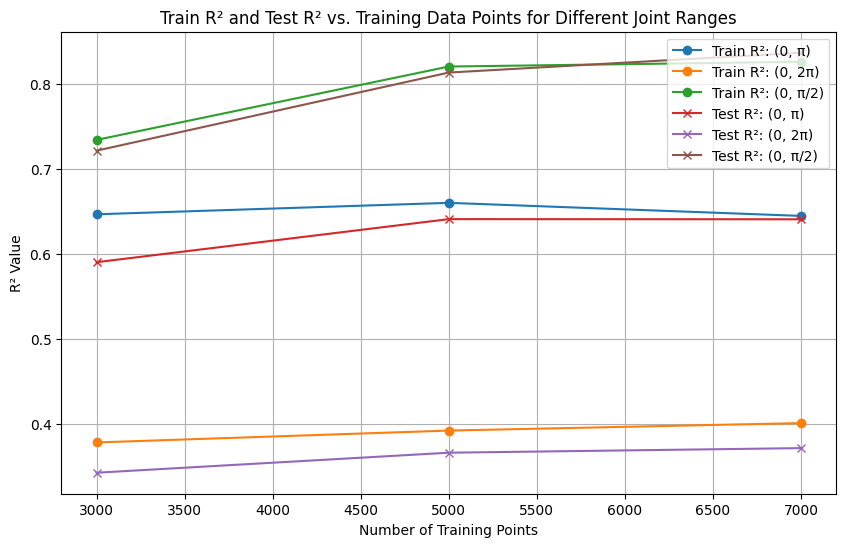

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting based on your given results
data = [
    # (Joint Range, Training Points, Train R², Test R²)
    {"joint_range": "(0, π)", "train_points": 3000, "train_r2": 0.6468, "test_r2": 0.5903},
    {"joint_range": "(0, π)", "train_points": 5000, "train_r2": 0.6603, "test_r2": 0.6411},
    {"joint_range": "(0, π)", "train_points": 7000, "train_r2": 0.6449, "test_r2": 0.6409},

    {"joint_range": "(0, 2π)", "train_points": 3000, "train_r2": 0.3778, "test_r2": 0.3421},
    {"joint_range": "(0, 2π)", "train_points": 5000, "train_r2": 0.3918, "test_r2": 0.3657},
    {"joint_range": "(0, 2π)", "train_points": 7000, "train_r2": 0.4006, "test_r2": 0.3711},

    {"joint_range": "(0, π/2)", "train_points": 3000, "train_r2": 0.7345, "test_r2": 0.7218},
    {"joint_range": "(0, π/2)", "train_points": 5000, "train_r2": 0.8210, "test_r2": 0.8139},
    {"joint_range": "(0, π/2)", "train_points": 7000, "train_r2": 0.8266, "test_r2": 0.8373}
]

# Prepare data for plotting
joint_ranges = ["(0, π)", "(0, 2π)", "(0, π/2)"]
train_points = [3000, 5000, 7000]

train_r2_values = {
    "(0, π)": [],
    "(0, 2π)": [],
    "(0, π/2)": []
}

test_r2_values = {
    "(0, π)": [],
    "(0, 2π)": [],
    "(0, π/2)": []
}

# Fill the dictionaries with Train R² and Test R² values for each joint range
for entry in data:
    joint_range = entry["joint_range"]
    train_points_value = entry["train_points"]
    train_r2_values[joint_range].append(entry["train_r2"])
    test_r2_values[joint_range].append(entry["test_r2"])

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Train R² values
for joint_range in joint_ranges:
    plt.plot(train_points, train_r2_values[joint_range], label=f'Train R²: {joint_range}', marker='o')

# Plot Test R² values
for joint_range in joint_ranges:
    plt.plot(train_points, test_r2_values[joint_range], label=f'Test R²: {joint_range}', marker='x')

# Customize plot
plt.title('Train R² and Test R² vs. Training Data Points for Different Joint Ranges')
plt.xlabel('Number of Training Points')
plt.ylabel('R² Value')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


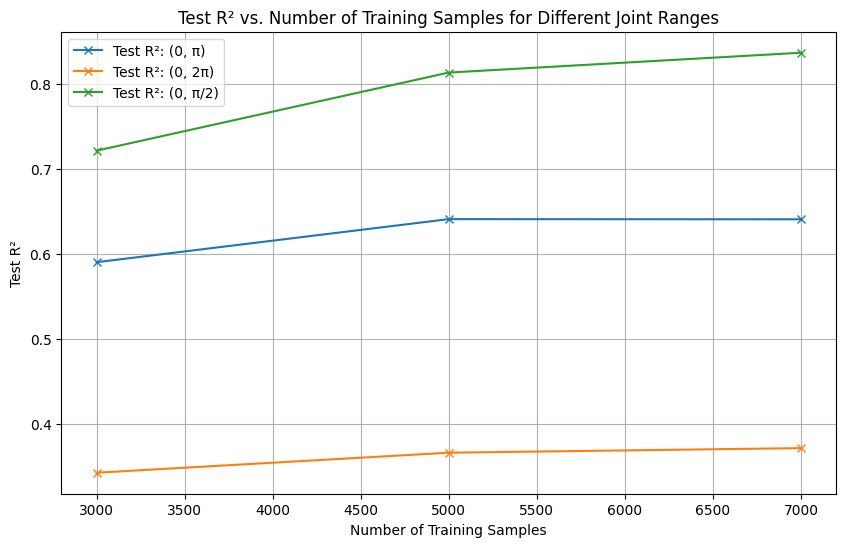

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting based on your given results
data = [
    # (Joint Range, Training Points, Train R², Test R²)
    {"joint_range": "(0, π)", "train_points": 3000, "train_r2": 0.6468, "test_r2": 0.5903},
    {"joint_range": "(0, π)", "train_points": 5000, "train_r2": 0.6603, "test_r2": 0.6411},
    {"joint_range": "(0, π)", "train_points": 7000, "train_r2": 0.6449, "test_r2": 0.6409},

    {"joint_range": "(0, 2π)", "train_points": 3000, "train_r2": 0.3778, "test_r2": 0.3421},
    {"joint_range": "(0, 2π)", "train_points": 5000, "train_r2": 0.3918, "test_r2": 0.3657},
    {"joint_range": "(0, 2π)", "train_points": 7000, "train_r2": 0.4006, "test_r2": 0.3711},

    {"joint_range": "(0, π/2)", "train_points": 3000, "train_r2": 0.7345, "test_r2": 0.7218},
    {"joint_range": "(0, π/2)", "train_points": 5000, "train_r2": 0.8210, "test_r2": 0.8139},
    {"joint_range": "(0, π/2)", "train_points": 7000, "train_r2": 0.8266, "test_r2": 0.8373}
]

# Prepare data for plotting
joint_ranges = ["(0, π)", "(0, 2π)", "(0, π/2)"]
train_points = [3000, 5000, 7000]

test_r2_values = {
    "(0, π)": [],
    "(0, 2π)": [],
    "(0, π/2)": []
}

# Fill the dictionary with Test R² values for each joint range
for entry in data:
    joint_range = entry["joint_range"]
    train_points_value = entry["train_points"]
    test_r2_values[joint_range].append(entry["test_r2"])

# Plotting the Test R² values vs. Number of Training Samples
plt.figure(figsize=(10, 6))

# Plot Test R² values for each joint range
for joint_range in joint_ranges:
    plt.plot(train_points, test_r2_values[joint_range], label=f'Test R²: {joint_range}', marker='x')

# Customize plot
plt.title('Test R² vs. Number of Training Samples for Different Joint Ranges')
plt.xlabel('Number of Training Samples')
plt.ylabel('Test R²')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# ------------- Forward Kinematics for 3D Arm (3 Joints) -------------
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    for i in range(len(joints)):
        xi = x[-1] + links[i] * np.cos(np.sum(joints[:i+1]))
        yi = y[-1] + links[i] * np.sin(np.sum(joints[:i+1]))
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Add some Z variation per joint
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array([x, y, z])

# ------------- Arm Class for 3D IK with ANN -------------
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin

    def create_data(self, model, n_train=3000, n_test=1000, joint_range=(0, np.pi)):
        self.model = model
        n_data = n_train + n_test
        # Random joint angles (uniform sampling)
        joint_space = np.random.uniform(joint_range[0], joint_range[1], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))

        for i in range(n_data):
            xyz = direct_kin_3d(joint_space[i], self.links, self.origin)
            cartesian_space[i] = xyz[:, -1]  # Get end-effector (X, Y, Z)

        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)  # R² score

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def predict(self, cartesian):
        predicted_joints = self.model.predict([cartesian])[0]
        xyz = direct_kin_3d(predicted_joints, self.links, self.origin)
        err = np.linalg.norm(xyz[:, -1] - cartesian)
        return err, predicted_joints, xyz[:, -1]

# ------------- Network Configuration for Task C -------------
configs = [
    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0005, "max_iter": 2000},
]

# ------------- Task C - Change Joint Range and Number of Data Points -------------
ranges = [
    {"range": (0, np.pi), "data_points": [500, 1000, 2000, 3000, 5000]},
    {"range": (0, 2 * np.pi), "data_points": [500, 1000, 2000, 3000, 5000]},
    {"range": (0, np.pi / 2), "data_points": [500, 1000, 2000, 3000, 5000]},
]

arm3d = Arm3D()

# Store results for learning performance later
results = []

# Loop over joint ranges and data points
for r in ranges:
    joint_range = r["range"]
    for n_train in r["data_points"]:
        n_test = 1000  # Keeping a constant test size
        print(f"\nRunning for Joint Range: {joint_range} and {n_train} Training Data Points")

        # Create data with the current joint range and number of training data points
        for cfg in configs:
            model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                                 activation=cfg["activation"],
                                 solver=cfg["solver"],
                                 learning_rate_init=cfg["learning_rate_init"],
                                 max_iter=cfg["max_iter"],
                                 early_stopping=True,
                                 random_state=42)

            arm3d.create_data(model, n_train=n_train, n_test=n_test, joint_range=joint_range)
            train_r2 = arm3d.train()
            test_r2 = arm3d.test()

            print(f"Configuration: {cfg}")
            print(f"Joint Range: {joint_range} | Number of Training Points: {n_train}")
            print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
            print("-" * 50)

            results.append({
                "Joint Range": str(joint_range),
                "Training Points": n_train,
                "Train R²": train_r2,
                "Test R²": test_r2
            })

# END: Code for Task C - Modifying joint ranges and number of data points

# Store the results as a pandas DataFrame for later analysis
results_df = pd.DataFrame(results)

# Optionally, save the results to a CSV file for later inspection
# results_df.to_csv('ik_results_task_c.csv', index=False)




# 3) Run experiments
    records = []
    for (r1, r2), label in zip(joint_ranges, range_labels):
        for n_train in train_sizes:
            n_test = int(n_train * test_fraction)
            mlp = MLPRegressor(**mlp_params)
            bot = arm()
            bot.create_data(mlp, n_train, n_test, r1, r2)
            train_r2 = bot.train_inv_kin()
            test_r2  = bot.test_inv_kin()
            records.append({
                'range':      label,
                'n_train':    n_train,
                'n_test':     n_test,
                'train_R2':   train_r2,
                'test_R2':    test_r2
            })

    # 4) Summarize
    df = pd.DataFrame(records)
    print(df)

    # 5) Plot: Test R² vs. n_train for each range
    plt.figure(figsize=(8,5))
    for label in range_labels:
        sub = df[df.range == label]
        plt.plot(sub.n_train, sub.test_R2, marker='o', label=label)
    plt.xscale('log')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Test R²')
    plt.title('Effect of Training Size & Joint‐Angle Range on Accuracy')
    plt.legend(title='Joint Range')
    plt.tight_layout()
    plt.show()



Running for Joint Range: (0, 3.141592653589793) and 500 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points: 500
Train R²: 0.5697 | Test R²: 0.4677
--------------------------------------------------

Running for Joint Range: (0, 3.141592653589793) and 1000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points: 1000
Train R²: 0.6204 | Test R²: 0.5458
--------------------------------------------------

Running for Joint Range: (0, 3.141592653589793) and 2000 Training Data Points
Configuration: {'layers': (150, 75, 25), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.0005, 'max_iter': 2000}
Joint Range: (0, 3.141592653589793) | Number of Training Points: 2

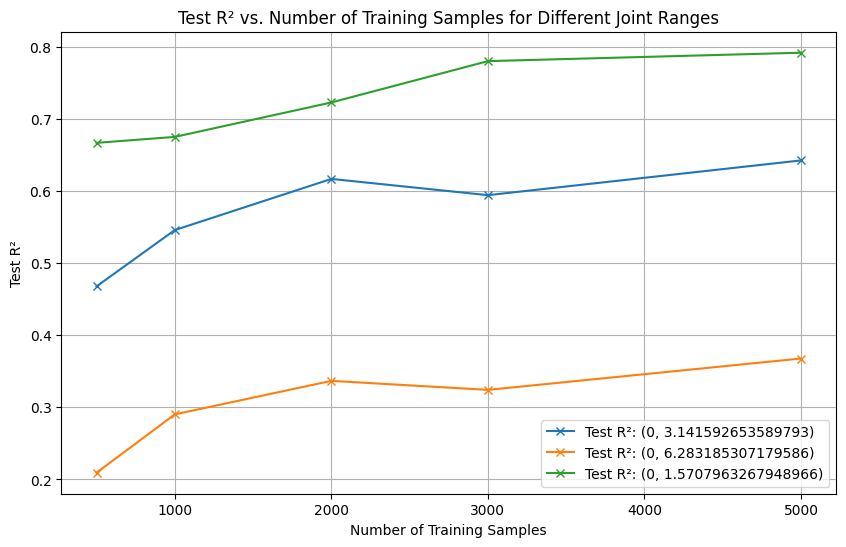

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# ------------- Forward Kinematics for 3D Arm (3 Joints) -------------
def direct_kin_3d(joints, links, origin=[0, 0, 0]):
    x, y, z = [origin[0]], [origin[1]], [origin[2]]
    for i in range(len(joints)):
        xi = x[-1] + links[i] * np.cos(np.sum(joints[:i+1]))
        yi = y[-1] + links[i] * np.sin(np.sum(joints[:i+1]))
        zi = z[-1] + links[i] * (0.2 * np.sin(joints[i]))  # Add some Z variation per joint
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array([x, y, z])

# ------------- Arm Class for 3D IK with ANN -------------
class Arm3D:
    def __init__(self, links=[10, 10, 10], origin=[0, 0, 0]):
        self.links = links
        self.origin = origin

    def create_data(self, model, n_train=3000, n_test=1000, joint_range=(0, np.pi)):
        self.model = model
        n_data = n_train + n_test
        # Random joint angles (uniform sampling)
        joint_space = np.random.uniform(joint_range[0], joint_range[1], (n_data, 3))
        cartesian_space = np.zeros((n_data, 3))

        for i in range(n_data):
            xyz = direct_kin_3d(joint_space[i], self.links, self.origin)
            cartesian_space[i] = xyz[:, -1]  # Get end-effector (X, Y, Z)

        self.cart_train = cartesian_space[:n_train]
        self.joint_train = joint_space[:n_train]
        self.cart_test = cartesian_space[n_train:]
        self.joint_test = joint_space[n_train:]

    def train(self):
        self.model.fit(self.cart_train, self.joint_train)
        return self.model.score(self.cart_train, self.joint_train)  # R² score

    def test(self):
        return self.model.score(self.cart_test, self.joint_test)

    def predict(self, cartesian):
        predicted_joints = self.model.predict([cartesian])[0]
        xyz = direct_kin_3d(predicted_joints, self.links, self.origin)
        err = np.linalg.norm(xyz[:, -1] - cartesian)
        return err, predicted_joints, xyz[:, -1]

# ------------- Network Configuration for Task C -------------
configs = [
    {"layers": (150, 75, 25), "activation": "relu", "solver": "adam", "learning_rate_init": 0.0005, "max_iter": 2000},
]

# ------------- Task C - Change Joint Range and Number of Data Points -------------
ranges = [
    {"range": (0, np.pi), "data_points": [500, 1000, 2000, 3000, 5000]},
    {"range": (0, 2 * np.pi), "data_points": [500, 1000, 2000, 3000, 5000]},
    {"range": (0, np.pi / 2), "data_points": [500, 1000, 2000, 3000, 5000]},
]

arm3d = Arm3D()

# Store results for learning performance later
results = []

# Loop over joint ranges and data points
for r in ranges:
    joint_range = r["range"]
    for n_train in r["data_points"]:
        n_test = 1000  # Keeping a constant test size
        print(f"\nRunning for Joint Range: {joint_range} and {n_train} Training Data Points")

        # Create data with the current joint range and number of training data points
        for cfg in configs:
            model = MLPRegressor(hidden_layer_sizes=cfg["layers"],
                                 activation=cfg["activation"],
                                 solver=cfg["solver"],
                                 learning_rate_init=cfg["learning_rate_init"],
                                 max_iter=cfg["max_iter"],
                                 early_stopping=True,
                                 random_state=42)

            arm3d.create_data(model, n_train=n_train, n_test=n_test, joint_range=joint_range)
            train_r2 = arm3d.train()
            test_r2 = arm3d.test()

            print(f"Configuration: {cfg}")
            print(f"Joint Range: {joint_range} | Number of Training Points: {n_train}")
            print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
            print("-" * 50)

            results.append({
                "Joint Range": str(joint_range),
                "Training Points": n_train,
                "Train R²": train_r2,
                "Test R²": test_r2
            })

# Store the results as a pandas DataFrame for later analysis
results_df = pd.DataFrame(results)

# Optionally, save the results to a CSV file for later inspection
# results_df.to_csv('ik_results_task_c.csv', index=False)

# ------------- Plot: Test R² vs. Number of Training Samples -------------
plt.figure(figsize=(10, 6))

# Plot Test R² values for each joint range
for joint_range in ranges:
    joint_range_str = str(joint_range["range"])
    subset = results_df[results_df["Joint Range"] == joint_range_str]
    plt.plot(subset["Training Points"], subset["Test R²"], label=f'Test R²: {joint_range_str}', marker='x')

# Customize plot
plt.title('Test R² vs. Number of Training Samples for Different Joint Ranges')
plt.xlabel('Number of Training Samples')
plt.ylabel('Test R²')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [27]:
# Mapping ranges to labels
range_label_map = {
    str((0, np.pi / 2)): "0,pi/2",
    str((0, np.pi)): "0,pi",
    str((0, 2 * np.pi)): "0,2*pi"
}

# Create labeled summary DataFrame
summary_records = []
for _, row in results_df.iterrows():
    label = range_label_map[row["Joint Range"]]
    n_train = row["Training Points"]
    n_test = 1000  # Fixed test size
    summary_records.append({
        "range": label,
        "n_train": n_train,
        "n_test": n_test,
        "train_R2": round(row["Train R²"], 6),
        "test_R2": round(row["Test R²"], 6)
    })

summary_df = pd.DataFrame(summary_records)

# Reset index to get the desired final format
summary_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(summary_df)

# Optional: save to CSV
# summary_df.to_csv("ik_results_formatted.csv", index=False)


     range  n_train  n_test  train_R2   test_R2
0     0,pi      500    1000  0.569732  0.467697
1     0,pi     1000    1000  0.620358  0.545786
2     0,pi     2000    1000  0.621186  0.616707
3     0,pi     3000    1000  0.651146  0.594187
4     0,pi     5000    1000  0.643609  0.642372
5   0,2*pi      500    1000  0.305304  0.209339
6   0,2*pi     1000    1000  0.346247  0.290217
7   0,2*pi     2000    1000  0.340563  0.336727
8   0,2*pi     3000    1000  0.341384  0.324206
9   0,2*pi     5000    1000  0.407503  0.367706
10  0,pi/2      500    1000  0.681208  0.666717
11  0,pi/2     1000    1000  0.694779  0.674977
12  0,pi/2     2000    1000  0.734785  0.722725
13  0,pi/2     3000    1000  0.802302  0.780030
14  0,pi/2     5000    1000  0.817969  0.791691
